# Euphoria Project: Understanding Island Happiness
Made only by `Matteo Bruni`

## Context
In the virtual world of **Euphoria**, an expansive digital archipelago, each island offers unique experiences and environments to its inhabitants. This project aims to explore and understand the characteristics that contribute to the happiness of island residents. By segmenting islands based on happiness levels, we can help similar travelers find their ideal destinations within Euphoria.

### Goals
- Identify key factors influencing the happiness levels on different islands.
- Segment islands to create traveler profiles, matching visitors to islands with similar features and happiness scores.
- Explore geographic, environmental, and amenity-based patterns to understand how these elements correlate with happiness and loyalty.

### Key Metrics
- **Happiness Index**: A measure of overall happiness among island inhabitants.
- **Loyalty Score**: Indicates retention and loyalty of visitors or residents on each island.
- **Total Refunds Requested**: Serves as an indirect measure of satisfaction or dissatisfaction.
- **Average Time in Euphoria**: Reflects the typical duration visitors spend on each island, indicating attraction levels.
- **Geographical Features**: Variables such as region, fauna-friendliness, and availability of water sources.

These metrics and characteristics will guide our exploratory data analysis (EDA) and inform our approach to clustering islands based on their happiness levels.


## EDA

### Setting Up and Exploring Basic Info

In [93]:
import pandas as pd

pd.set_option('display.max_colwidth', None)  # Allow full column width display
pd.set_option('display.colheader_justify', 'right')  # Align column headers to the left (for header alignment only)
pd.set_option('display.width', 1000)         # Set a larger width for the entire display

# Load the dataset to inspect its structure and content
euphoria_data = pd.read_csv("euphoria.csv")

# Display basic information and the first few rows to understand the dataset
print("Basic Info:")
print(euphoria_data.info())

print("\nFirst 5 Rows:")
print(euphoria_data.head())

# Check for duplicates
duplicates = euphoria_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         89572 non-null  float64
 1   water_sources            89536 non-null  float64
 2   shelters                 89382 non-null  float64
 3   fauna_friendly           35163 non-null  object 
 4   island_size              89578 non-null  float64
 5   creation_time            89462 non-null  float64
 6   region                   89306 non-null  object 
 7   happiness_metric         89566 non-null  object 
 8   features                 75035 non-null  object 
 9   happiness_index          89455 non-null  float64
 10  loyalty_score            89546 non-null  float64
 11  total_refunds_requested  89705 non-null  float64
 12  trade_goods              89673 non-null  object 
 13  x_coordinate             89491 non-null  float64
 14  avg_time_i

### Exploring Null Values


Missing Data Summary:
                         Missing Values  Percentage (%)
fauna_friendly                    64329       64.657460
features                          24457       24.581876
nearest_city                      10239       10.291280
region                            10186       10.238009
entry_fee                         10126       10.177703
shelters                          10110       10.161621
y_coordinate                      10099       10.150565
happiness_index                   10037       10.088248
creation_time                     10030       10.081213
x_coordinate                      10001       10.052064
island_id                          9972       10.022916
avg_time_in_euphoria               9966       10.016886
water_sources                      9956       10.006835
loyalty_score                      9946        9.996784
happiness_metric                   9926        9.976682
referral_friends                   9920        9.970651
island_size              

<Figure size 1200x600 with 0 Axes>

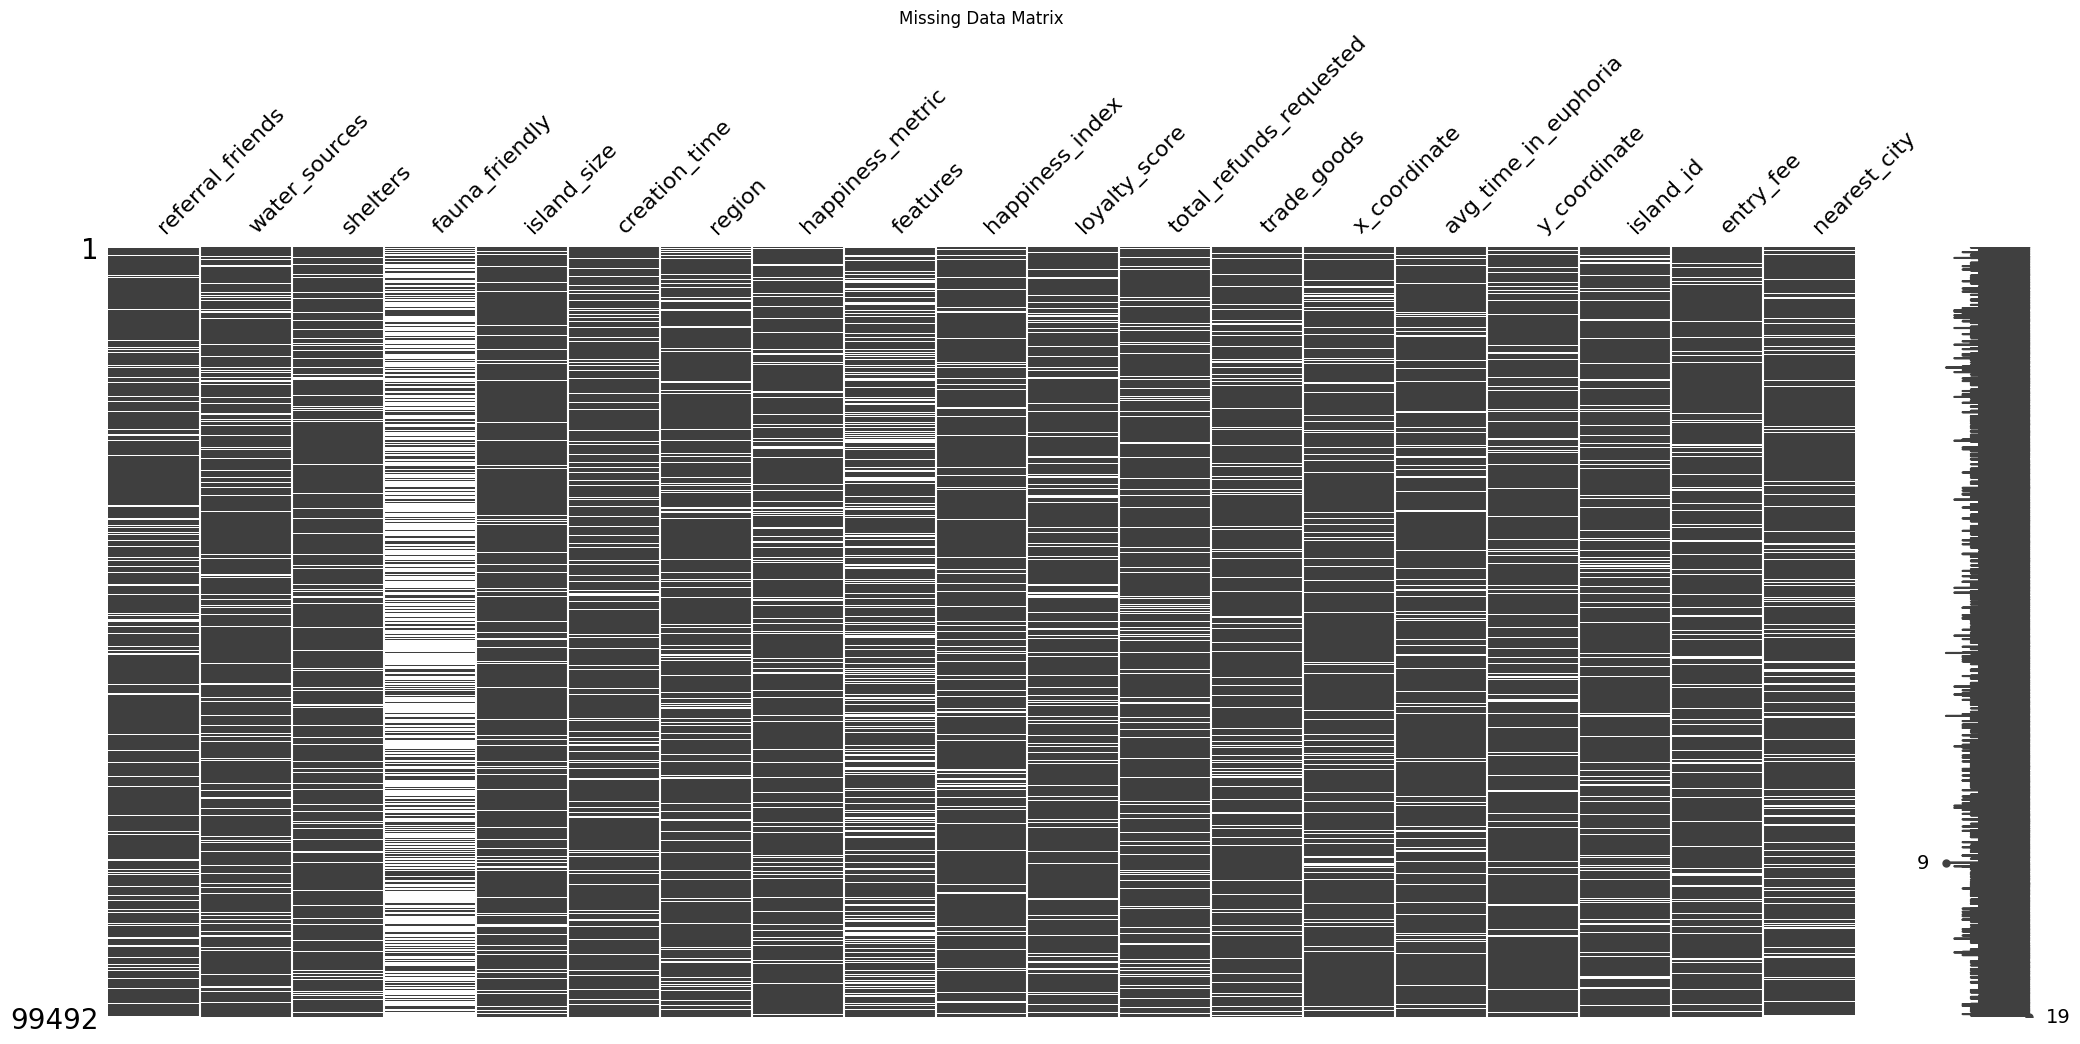

In [94]:
import matplotlib.pyplot as plt

# Calculate missing values and percentages
missing_values_count = euphoria_data.isnull().sum()
missing_percentage = (missing_values_count / len(euphoria_data)) * 100

# Combine into a dataframe
missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values_count,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

# Display the dataframe
print("\nMissing Data Summary:")
print(missing_data_summary)

# Visualize missing data
import missingno as msno

# Missing data matrix
plt.figure(figsize=(12, 6))
msno.matrix(euphoria_data)
plt.title("Missing Data Matrix")
plt.show()

### Exploring Categorical Variables

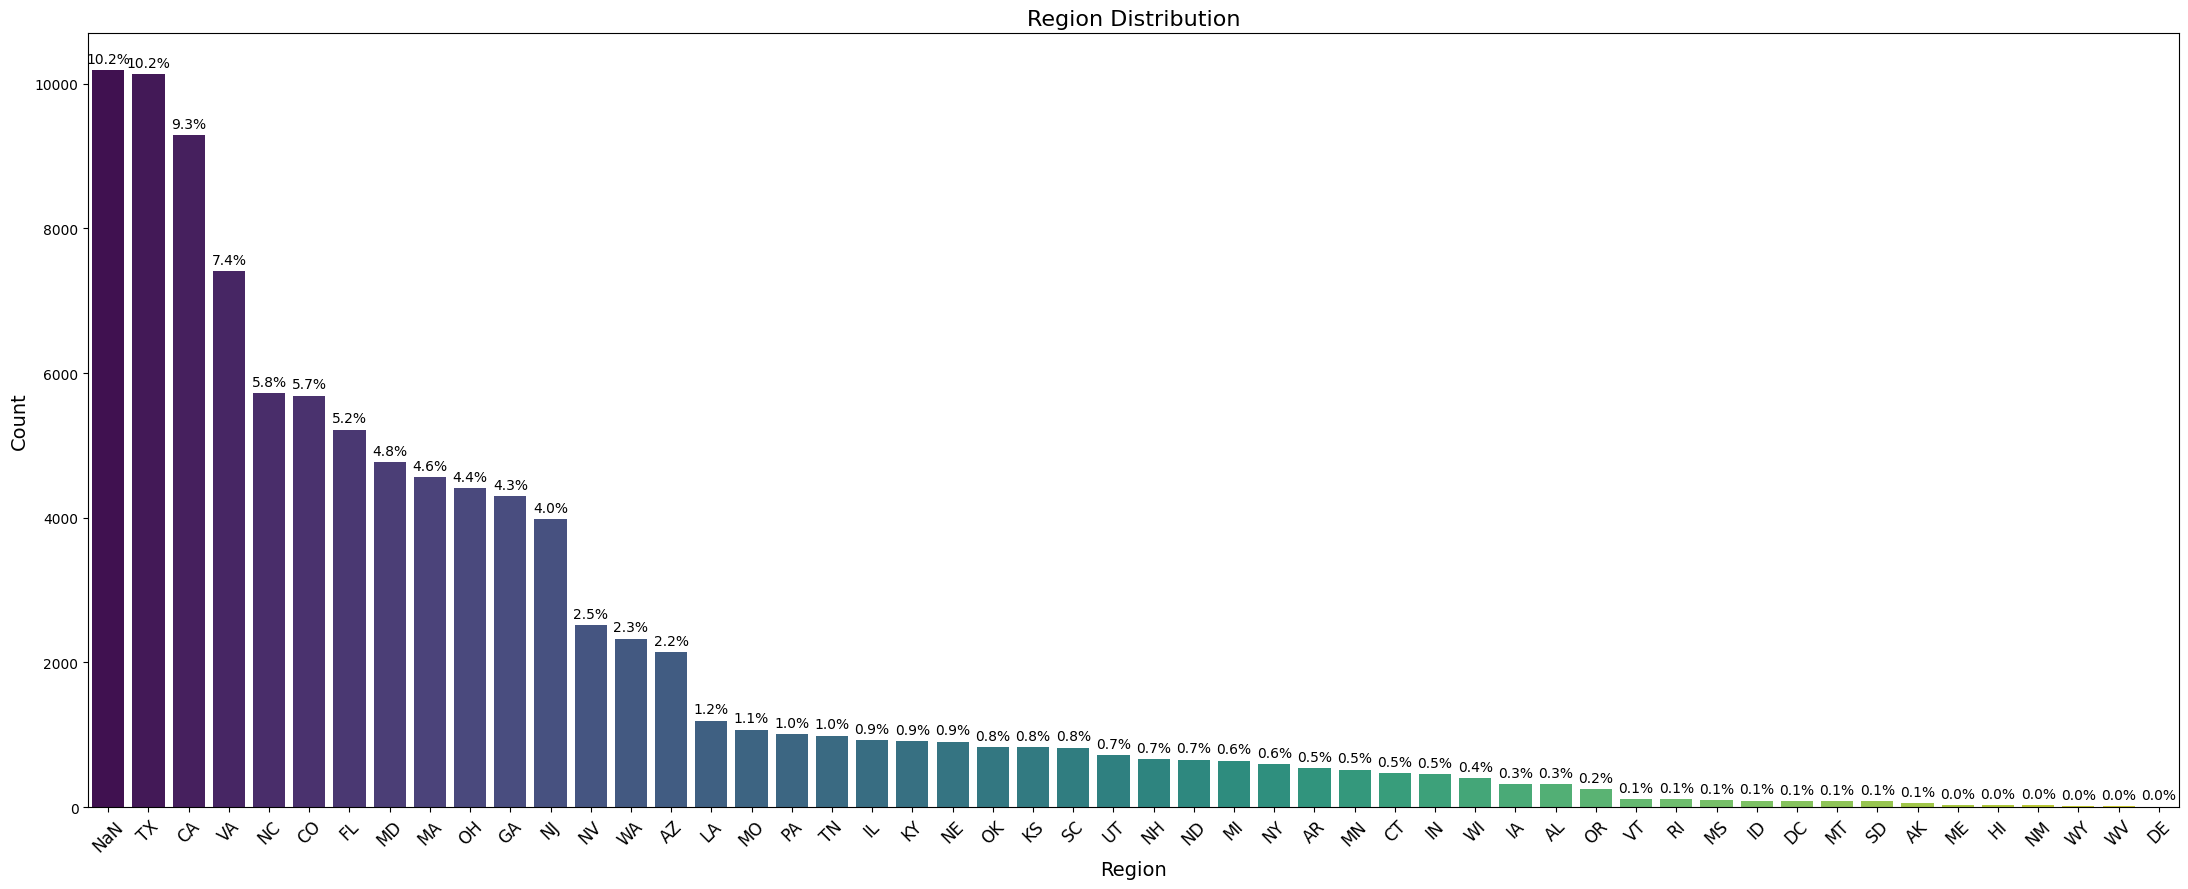

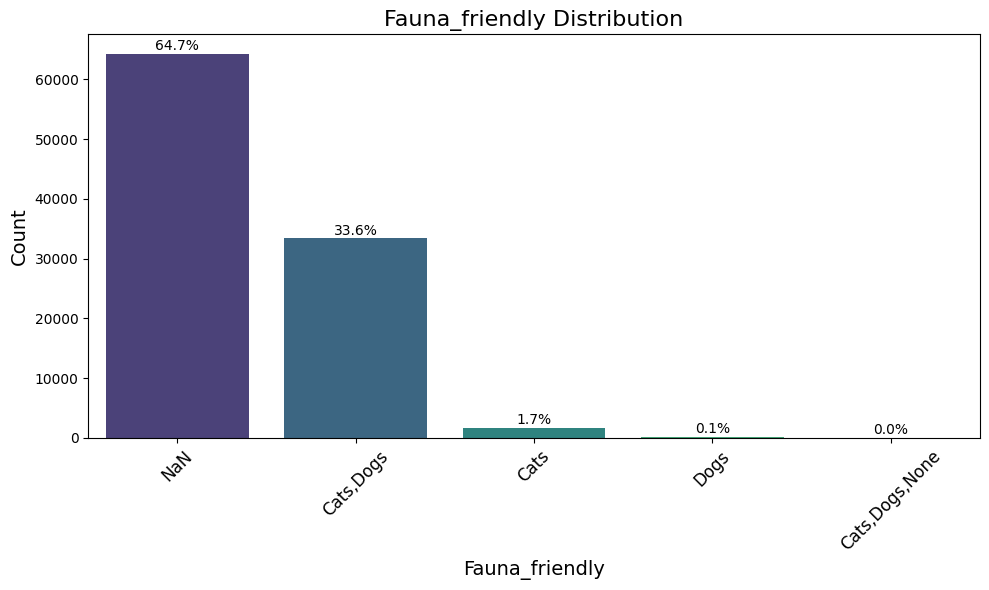

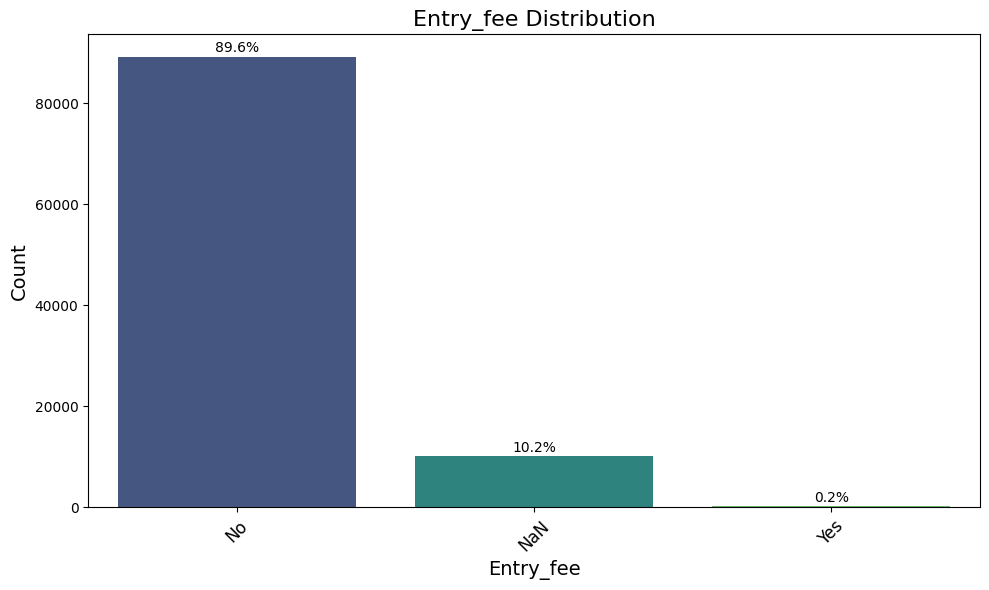

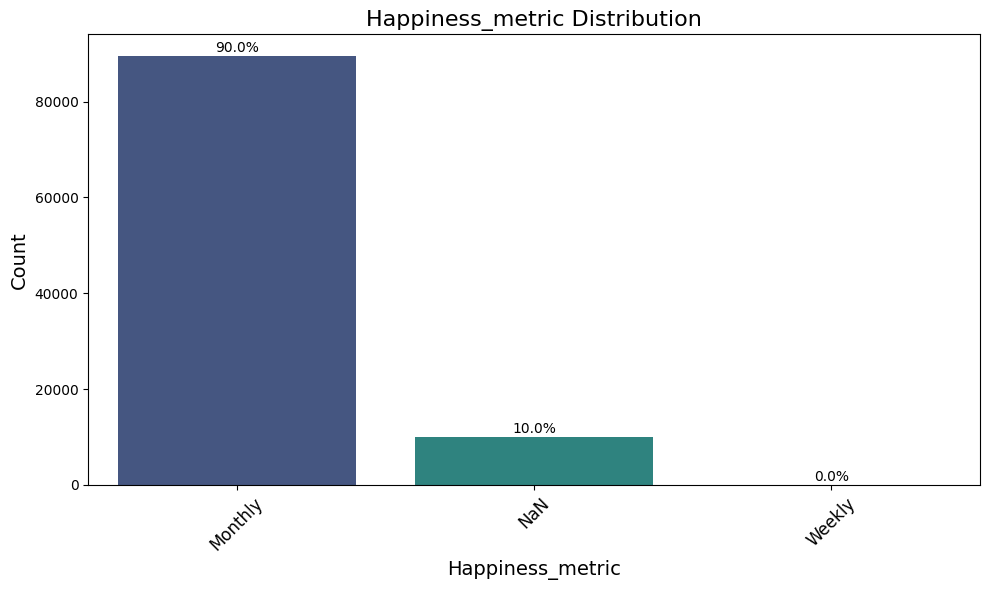

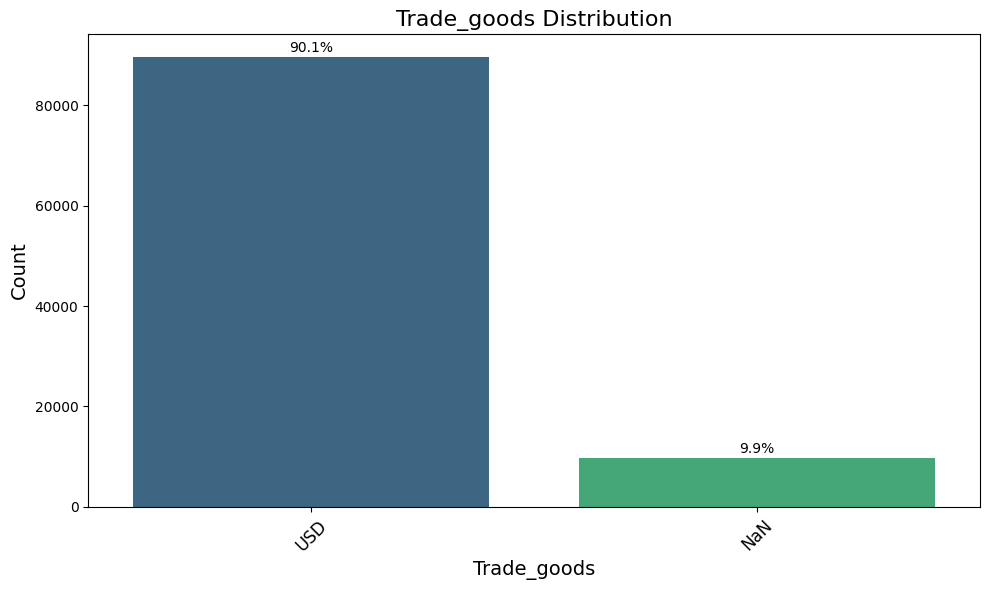

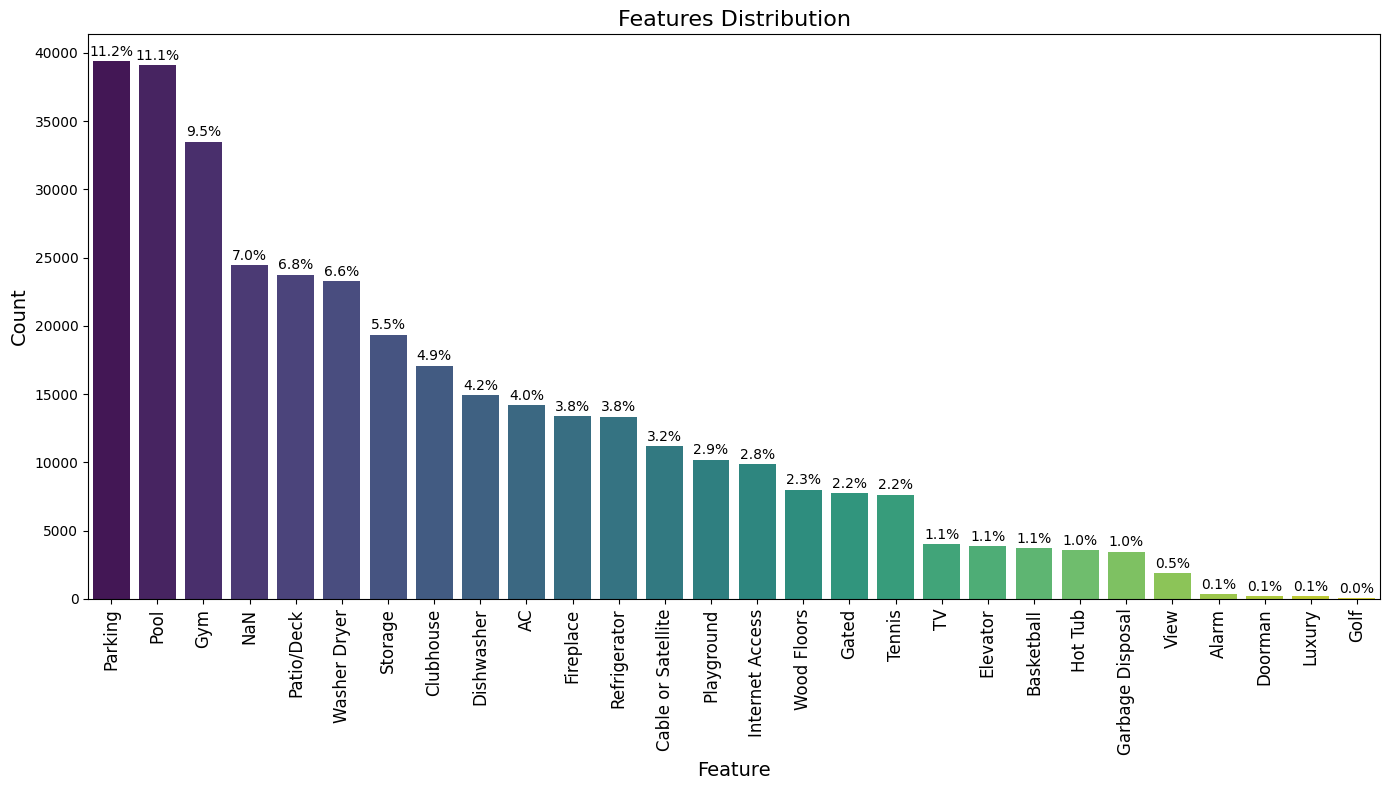

In [95]:
import seaborn as sns

# Function to plot categorical distribution
def plot_categorical_distribution(data, column, figsize=(10, 6), rotation=45, show_percent=True):
    """
    Plots the distribution of a categorical column, including counts of 'None' (NaN) values.
    """
    # Include None/NaN counts as a separate category
    counts = data[column].fillna('NaN').value_counts()

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(x=counts.index, y=counts.values, hue= counts.index, palette="viridis")
    plt.xticks(rotation=rotation, fontsize=12)
    plt.title(f'{column.capitalize()} Distribution', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add percentage labels
    if show_percent:
        for i, v in enumerate(counts.values):
            plt.text(
                i, v + max(counts.values) * 0.01,  # Slightly offset for visibility
                f"{(v / counts.sum() * 100):.1f}%",
                ha='center', fontsize=10
            )
    
    plt.tight_layout()
    plt.show()

# Function to analyze features column (list or comma-separated values)
def plot_feature_distribution(data, column, figsize=(14, 8)):
    """
    Plots the distribution of items in a column containing lists or comma-separated values.
    Handles NaN values explicitly.
    """
    # Handle missing values by replacing them with "NaN"
    features_series = data[column].fillna('NaN')

    # Split the feature strings into individual items, flatten the list
    features_split = features_series.str.split(',')
    features_flattened = [item.strip() for sublist in features_split for item in sublist]  # Trim whitespace

    # Count occurrences of each feature
    features_counts = pd.Series(features_flattened).value_counts()

    # Prepare the data for visualization
    features_df = pd.DataFrame(features_counts).reset_index()
    features_df.columns = ['Feature', 'Count']
    features_df['Percentage'] = (features_df['Count'] / features_df['Count'].sum()) * 100

    # Create the vertical barplot
    plt.figure(figsize=figsize)
    sns.barplot(x='Feature', y='Count', data=features_df, hue='Feature', palette='viridis')

    # Add percentages on top of the bars
    for index, row in features_df.iterrows():
        plt.text(
            index, row['Count'] + max(features_df['Count']) * 0.01,  # Offset based on maximum value
            f"{row['Percentage']:.1f}%",
            ha='center', fontsize=10
        )

    # Customize the plot
    plt.title('Features Distribution', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot categorical distributions
categorical_columns = ['region', 'fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']
for col in categorical_columns:
    figsize = (22, 9) if col == 'region' else (10, 6)
    plot_categorical_distribution(euphoria_data, col, figsize)

# Plot the features column distribution
plot_feature_distribution(euphoria_data, 'features')


### Exploring Numerical Variables

#### Formula for Skewness:
The skewness \( S \) is calculated using the formula:
$$
S = \frac{\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^3}{\left(\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2\right)^{\frac{3}{2}}}
$$
Where:
- $N$: Number of data points
- $x_i$: Individual data point
- $\bar{x}$: Mean of the data
- $\sum$: Summation over all data points

#### Interpretation of Skewness:
- **Skewness ≈ 0**:
  - The data is approximately symmetric.
  
- **Positive Skewness (Skewness > 0)**:
  - The right tail (higher values) is longer or heavier. For example, income data where some individuals earn much higher salaries.

- **Negative Skewness (Skewness < 0)**:
  - The left tail (lower values) is longer or heavier. For example, test scores where many students score high, and few score low.

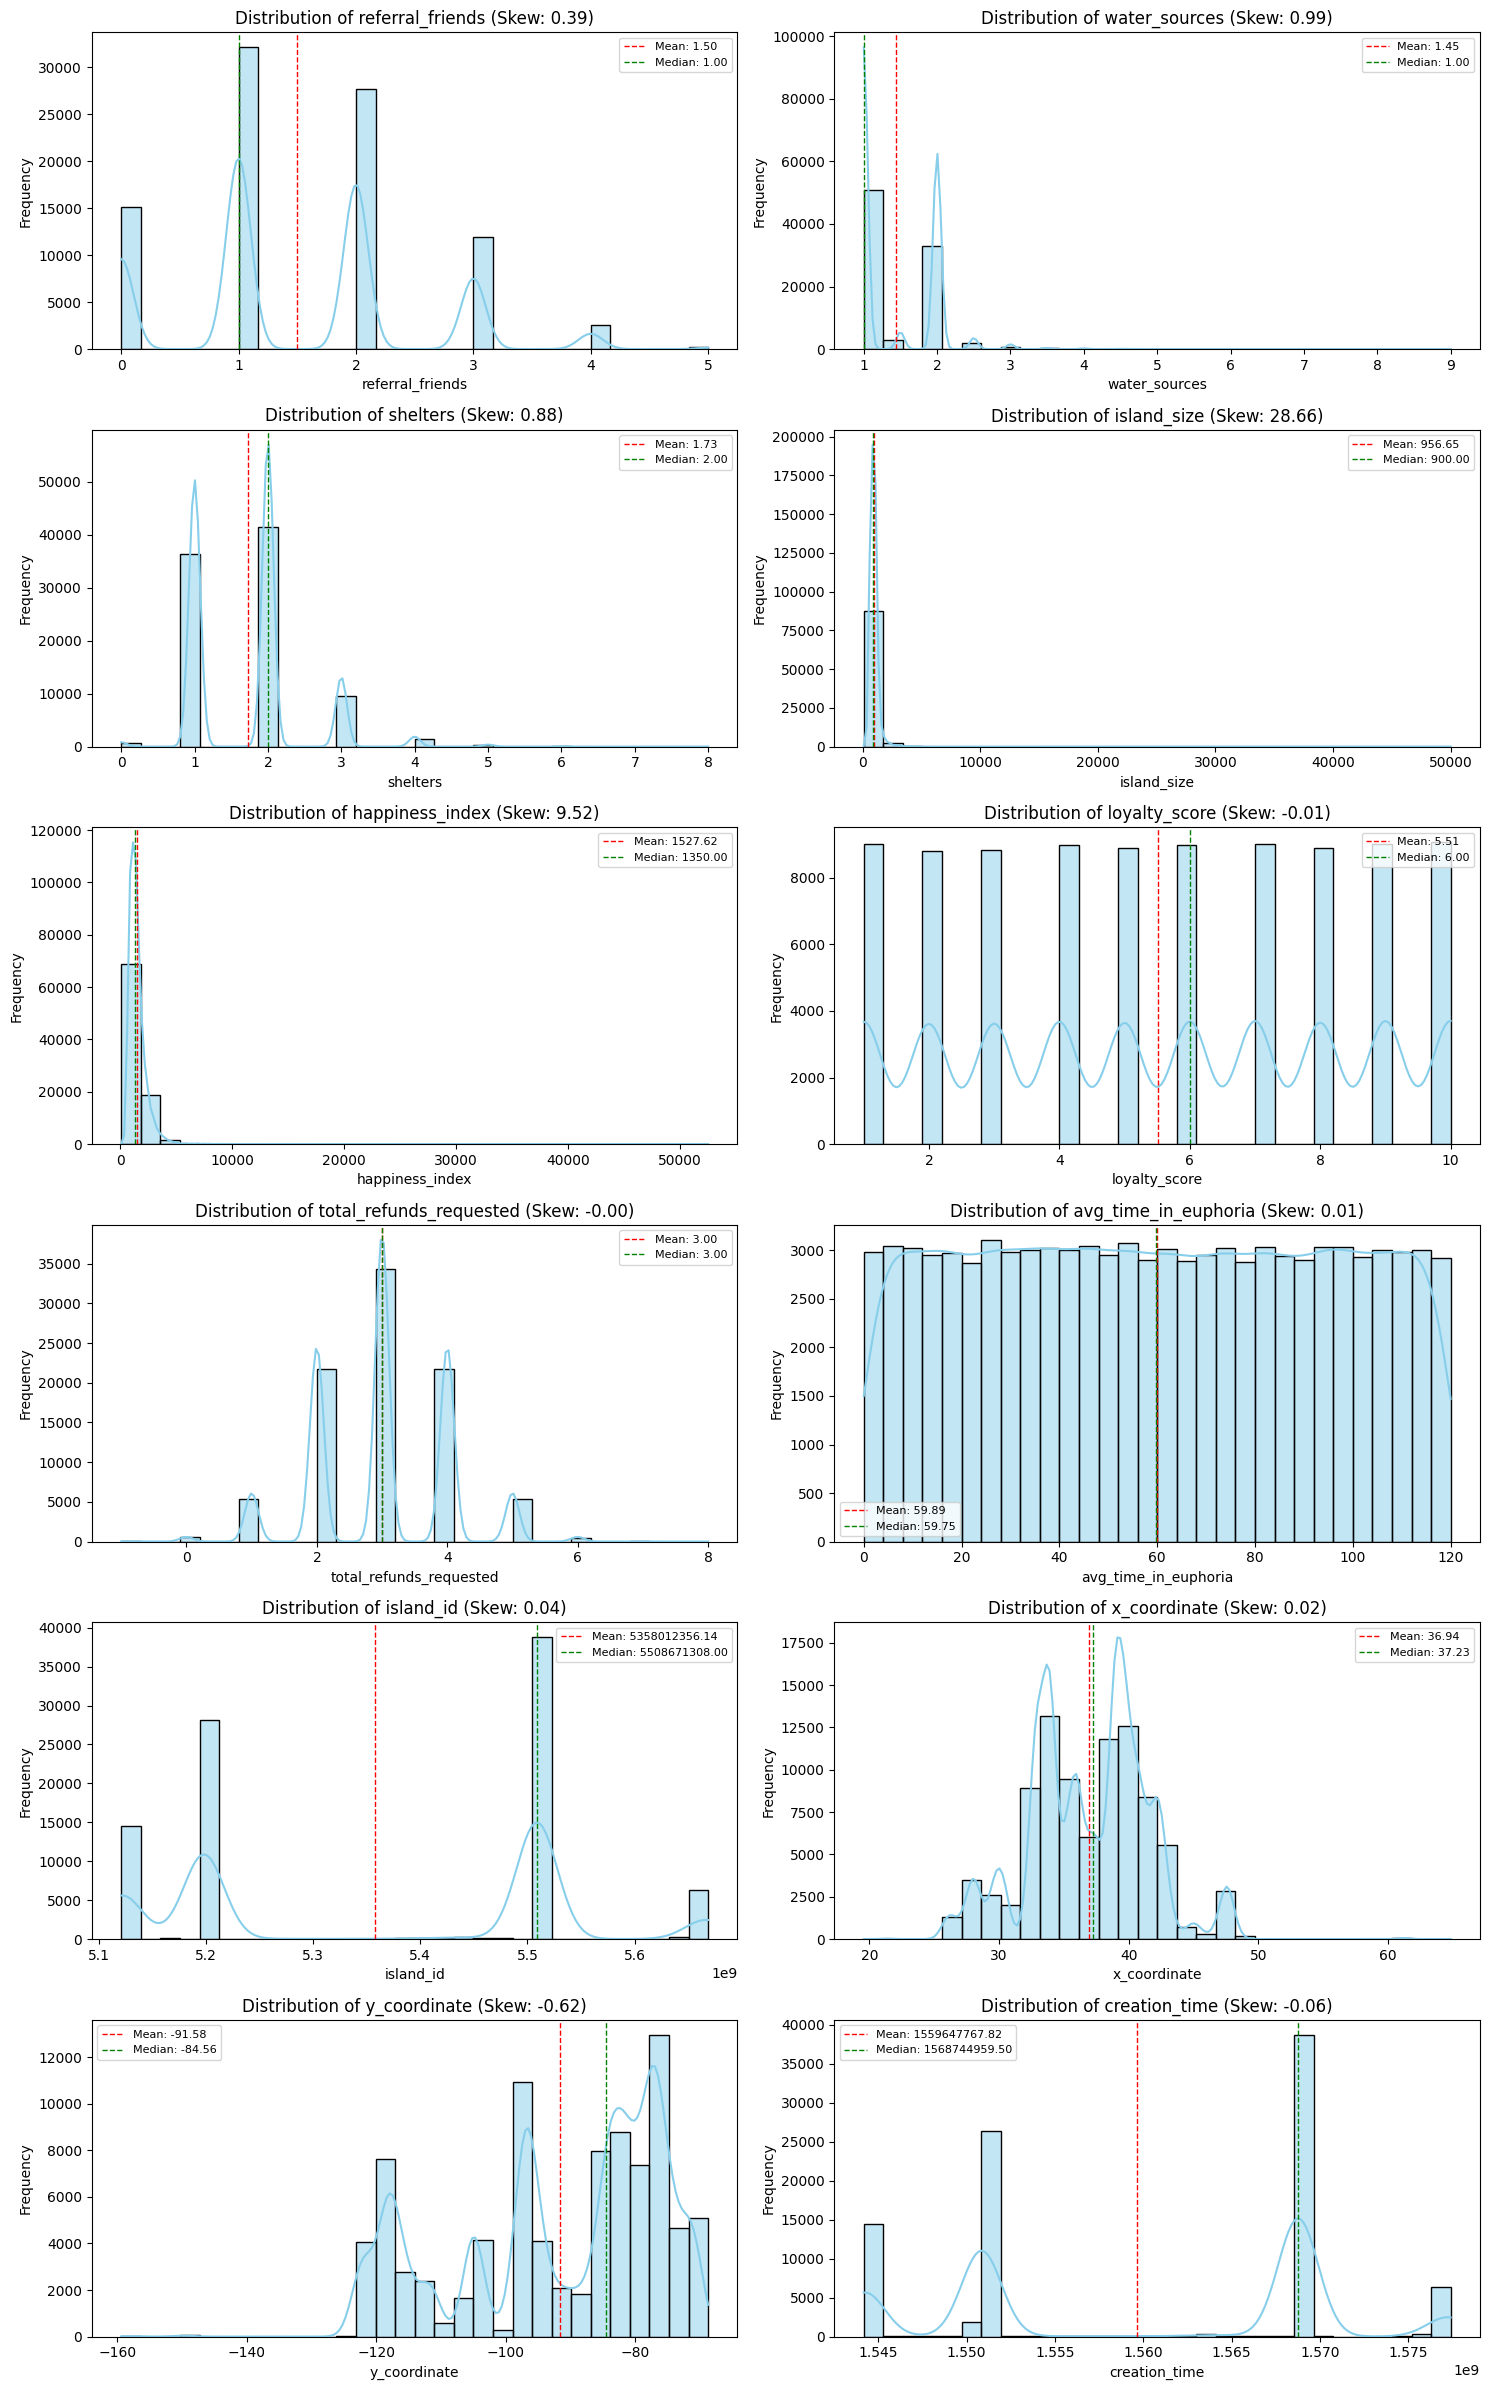

In [96]:
from scipy.stats import skew

def plot_numeric_distributions(data, numeric_columns, bins=30):
    """
    Plots the distributions of numeric columns with KDE, including skewness and summary stats.
    
    Parameters:
    - data: DataFrame containing the data.
    - numeric_columns: List of numeric column names.
    - bins: Number of bins for the histogram.
    """
    # Calculate the grid size for subplots
    n_cols = 2
    n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division

    plt.figure(figsize=(15, n_rows * 4))  # Adjust figure height dynamically
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Handle missing values and calculate skewness
        col_data = data[col].dropna()
        col_skewness = skew(col_data)
        
        # Plot histogram with KDE
        sns.histplot(col_data, kde=True, bins=bins, color="skyblue", edgecolor="black")
        
        # Add title and labels
        plt.title(f'Distribution of {col} (Skew: {col_skewness:.2f})', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        
        # Add mean and median as vertical lines
        mean_val = col_data.mean()
        median_val = col_data.median()
        plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', linewidth=1, label=f'Median: {median_val:.2f}')
        plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()

# List of numeric columns to explore
numeric_columns = [
    'referral_friends', 'water_sources', 'shelters', 'island_size', 
    'happiness_index', 'loyalty_score', 'total_refunds_requested', 
    'avg_time_in_euphoria', 'island_id', 'x_coordinate', 'y_coordinate', 'creation_time'
]
#numeric_columns = euphoria_data.select_dtypes(include='number')

# Call the function
plot_numeric_distributions(euphoria_data, numeric_columns)


## Handling Missing Values and Columns

### Handling Numerical Columns

#### **Reasons for Removing Rows with Missing `happiness_index`**

1. **Critical Importance of `happiness_index`**:
   - As the **target variable**, `happiness_index` is essential for analysis and modeling.
   - Rows with missing target values cannot be used for training or evaluation.

2. **Risk of Inaccuracy with Imputation**:
   - Imputing values for a target variable like `happiness_index` can introduce significant inaccuracies or biases, especially if the missingness is not random.

3. **Sufficient Remaining Data**:
   - With a dataset of nearly **100,000 rows**, removing around **10%** of rows (those with missing `happiness_index`) still leaves a large dataset, ensuring sufficient data for accurate analysis and modeling.

4. **Avoiding Noise and Complexity**:
   - Rows with missing `happiness_index` add noise and unnecessary complexity to the dataset, potentially lowering the quality of analysis and model performance.

5. **Simplified Preprocessing**:
   - By removing these rows, the preprocessing pipeline is simpler and ensures the integrity of the dataset for downstream tasks.

---

##### **Conclusion**
The rows with missing `happiness_index` are removed because:
- They cannot contribute to meaningful analysis or modeling.
- Removing them ensures accuracy and simplicity while retaining sufficient data for robust results.

In [97]:
# Check the number of rows before removal
print(f"Number of rows before removal: {euphoria_data.shape[0]}")

# Remove rows where 'happiness_index' is missing
euphoria_data = euphoria_data.dropna(subset=['happiness_index'])

# Check the number of rows after removal
print(f"Number of rows after removal: {euphoria_data.shape[0]}")


Number of rows before removal: 99492
Number of rows after removal: 89455


#### **Reasons to Remove `island_id`**
1. **Missing Values**:
   - `island_id` has 10% missing values, which makes it unreliable as a unique identifier.

2. **Irrelevance to Analysis**:
   - The `island_id` column serves as an identifier and doesn't contribute meaningful information for analysis or modeling.

3. **Row Index as Identifier**:
   - If each row in your dataset represents a unique entry (which seems to be the case), the row index can serve as a unique identifier without the need for `island_id`.

By removing `island_id` and using the row index, we simplify the dataset while preserving the ability to uniquely identify each entry. 

In [98]:
if 'island_id' in euphoria_data.columns:
    # Exclude rows where 'island_id' is NaN
    non_missing_ids = euphoria_data[~euphoria_data['island_id'].isna()]
    
    # Identify duplicate rows based on non-missing 'island_id'
    duplicate_ids = non_missing_ids[non_missing_ids['island_id'].duplicated(keep=False)]
    
    print(f"Total duplicate rows with non-missing 'island_id': {len(duplicate_ids)}")
    print(duplicate_ids.head())  # Display a sample of duplicate rows
    
    # Drop all rows where 'island_id' is duplicated
    euphoria_data = euphoria_data[~euphoria_data['island_id'].isin(duplicate_ids['island_id'])]
    print(f"Dataset after removing all duplicate IDs: {euphoria_data.shape}")
else:
    print("'island_id' column does not exist in the dataset.")

# Remove the 'island_id' column
if 'island_id' in euphoria_data.columns:
    euphoria_data.drop(columns=['island_id'], inplace=True)
    print("'island_id' column has been removed.")
else:
    print("'island_id' column does not exist in the dataset.")

# Ensure the row index is unique
if not euphoria_data.index.is_unique:
    euphoria_data.reset_index(drop=True, inplace=True)
    print("Row index has been reset to ensure uniqueness.")

# Confirm the new structure
print(f"Dataset shape: {euphoria_data.shape}")
print("Row index is now used as the unique identifier.")



Total duplicate rows with non-missing 'island_id': 116
      referral_friends  water_sources  shelters fauna_friendly  island_size  creation_time region happiness_metric                                                                           features  happiness_index  loyalty_score  total_refunds_requested trade_goods  x_coordinate  avg_time_in_euphoria  y_coordinate     island_id entry_fee nearest_city
277                2.0            1.0       3.0      Cats,Dogs        983.0   1.550813e+09     TN          Monthly                                                                                NaN           1489.0            8.0                      2.0         USD       35.1478                 70.04      -90.0521  5.197679e+09        No      Memphis
434                1.0            2.0       2.0            NaN       1376.0   1.568754e+09     OH          Monthly                                                                            Parking           2205.0           10.0        

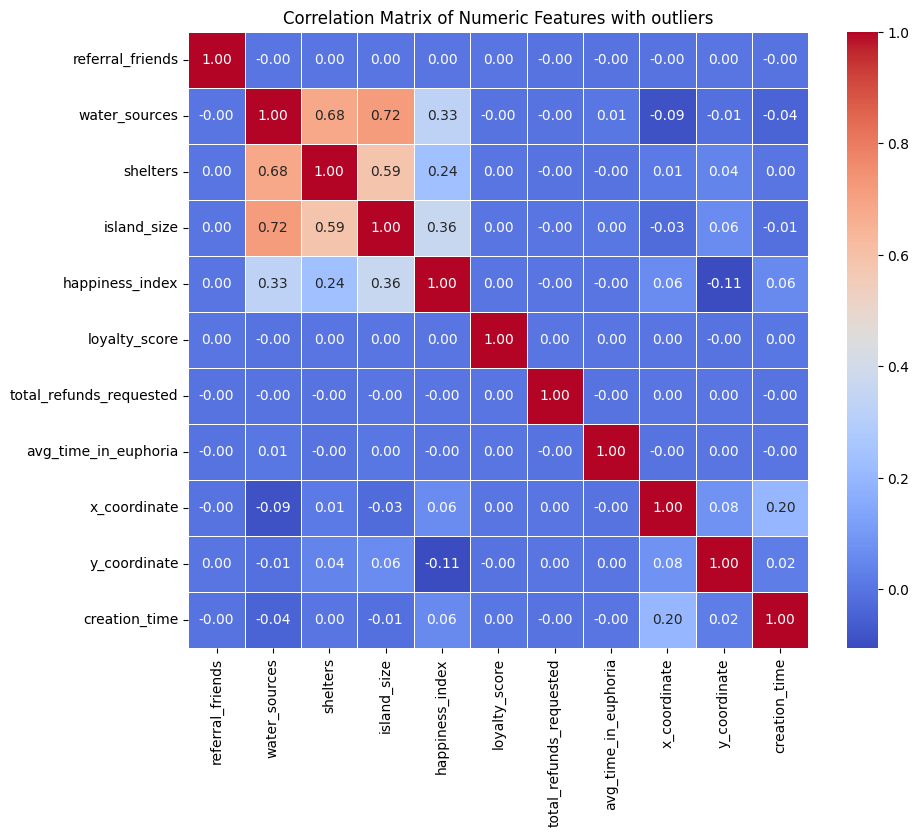

In [99]:
numeric_columns = [
    'referral_friends', 'water_sources', 'shelters', 'island_size', 
    'happiness_index', 'loyalty_score', 'total_refunds_requested', 
    'avg_time_in_euphoria', 'x_coordinate', 'y_coordinate', 'creation_time'
]
# Compute correlation matrix for numeric columns
correlation_matrix = euphoria_data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features with outliers')
plt.show()

#### **Reasons for Removing the Columns** referral_friends, loyalty_score, total_refunds_requested, avg_time_in_euphoria, x_coordinate, y_coordinate, and creation_time

1. **No Significant Correlation with `happiness_index`**:
   - All the columns have negligible correlations with the target variable (`happiness_index`), ranging from **0.00** to very weak correlations like **0.06** or **-0.11**.

2. **No Significant Correlation with Other Features**:
   - Most columns show near-zero correlation with other features, making them redundant in the dataset.

3. **Low Predictive Utility**:
   - Due to the lack of meaningful relationships with the target and other features, these columns are unlikely to contribute useful information for analysis or modeling.

4. **Dataset Simplification**:
   - Removing these uninformative columns helps simplify the dataset, reducing dimensionality and potential noise, improving interpretability and model performance.

In [100]:
columns_to_remove = [
    'referral_friends', 'loyalty_score', 'total_refunds_requested', 
    'avg_time_in_euphoria', 'x_coordinate', 'y_coordinate', 'creation_time'
]

# Ensure the columns exist in the dataset before dropping
existing_columns_to_remove = [col for col in columns_to_remove if col in euphoria_data.columns]

if existing_columns_to_remove:
    euphoria_data.drop(columns=existing_columns_to_remove, inplace=True)
    print(f"Columns removed: {existing_columns_to_remove}")
    print(f"Updated dataset shape: {euphoria_data.shape}")
else:
    print("No columns to remove.")

Columns removed: ['referral_friends', 'loyalty_score', 'total_refunds_requested', 'avg_time_in_euphoria', 'x_coordinate', 'y_coordinate', 'creation_time']
Updated dataset shape: (89339, 11)


### Handling Categorical Columns

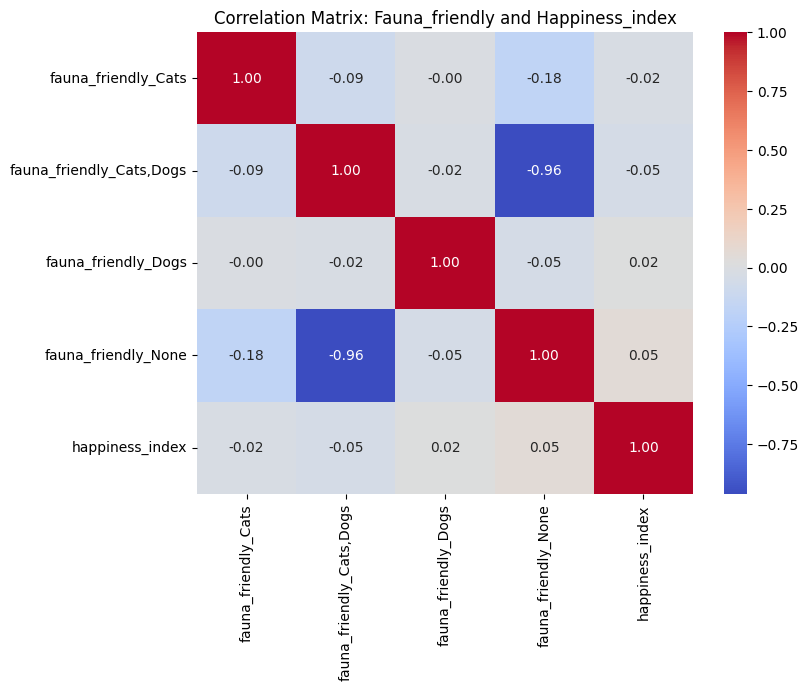

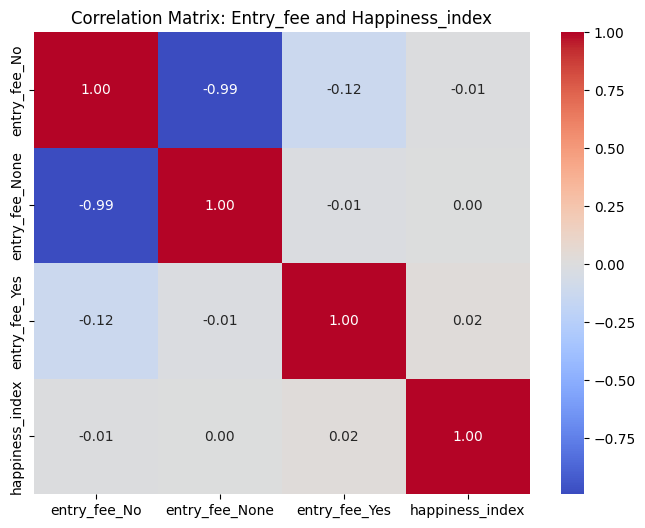

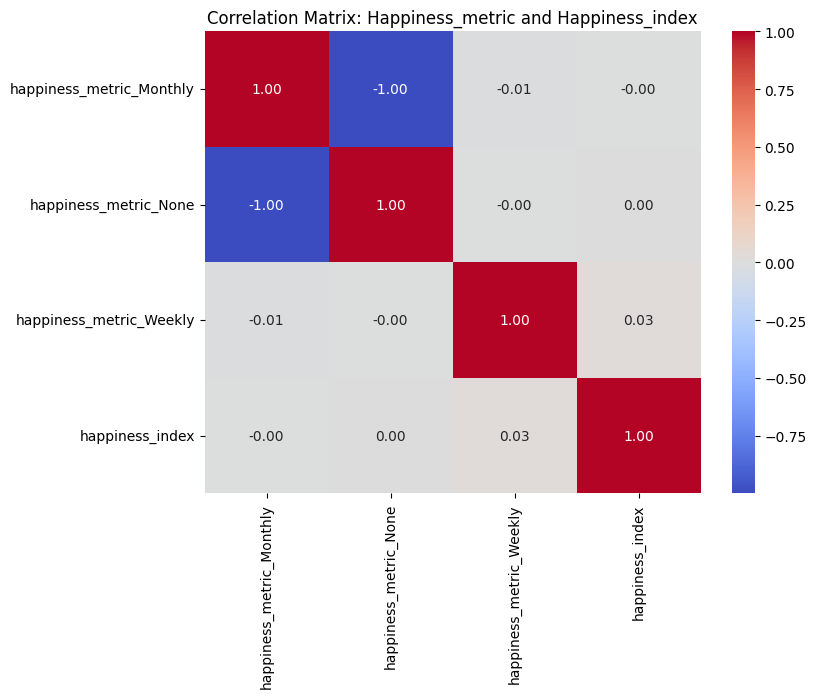

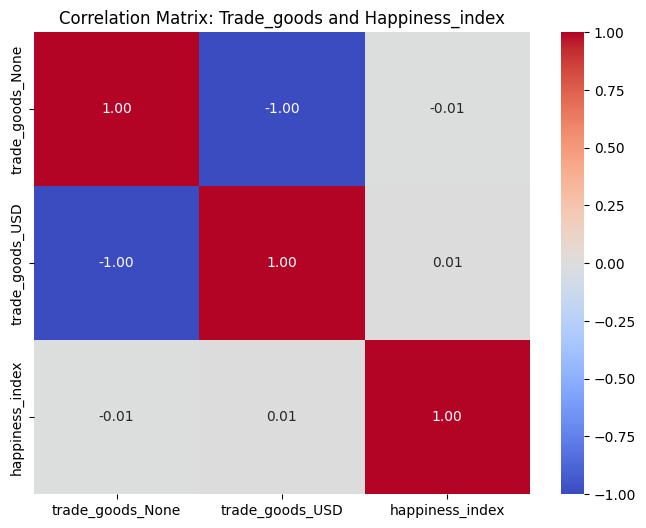

In [101]:
def analyze_categorical_correlation(data, categorical_columns, target_column):
    for col in categorical_columns:
        if col in data.columns:
            # Encode the categorical column, including 'None', as binary categories
            data[col] = data[col].fillna('None')
            data = pd.get_dummies(data, columns=[col], drop_first=False)

            # Filter the correlation matrix to include only the categorical-related columns and target_column
            categorical_columns_encoded = [encoded_col for encoded_col in data.columns if f'{col}_' in encoded_col]
            selected_columns = categorical_columns_encoded + [target_column]

            # Calculate correlation matrix for selected columns
            correlation_matrix = data[selected_columns].corr()

            # Visualize the correlation matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
            plt.title(f'Correlation Matrix: {col.capitalize()} and {target_column.capitalize()}')
            plt.show()

euphoria_data['fauna_friendly'] = euphoria_data['fauna_friendly'].replace('Cats,Dogs,None', 'Cats,Dogs')
categorical_columns = ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']
analyze_categorical_correlation(euphoria_data, categorical_columns, 'happiness_index')

#### **Reasons for Removing `entry_fee`, `happiness_metric`, `trade_goods`, and `fauna_friendly`:**

1. **No Significant Correlation**:
   - None of these columns show meaningful correlation with the target variable (`happiness_index`), as all correlation values are negligible.

2. **Extreme Imbalance**:
   - Each column is dominated by a single category, with minimal representation in other categories:
     - **`entry_fee`**: `No` (89.6%), `None` (10.2%), `Yes` (0.2%).
     - **`happiness_metric`**: `Monthly` (90%), `None` (10%), `Weekly` (0%).
     - **`trade_goods`**: `USD` (90%), `None` (10%).
     - **`fauna_friendly`**: `NaN` (64.7%), `Cats,Dogs` (33.6%), with other categories accounting for less than 2%.

3. **High Missing Values** (Specific to `fauna_friendly`):
   - The `fauna_friendly` column contains 64.7% missing values, making it unreliable and unsuitable for analysis.

4. **Low Predictive Utility**:
   - The lack of variability and negligible correlation in these columns indicates they are unlikely to contribute to predictive modeling or provide meaningful insights.

---

##### **Conclusion**
The columns `entry_fee`, `happiness_metric`, `trade_goods`, and `fauna_friendly` are removed to simplify the dataset, reduce noise, and focus on features that offer greater analytical or predictive value.

In [102]:
columns_to_remove = ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']

# Ensure the columns exist in the dataset before dropping
existing_columns_to_remove = [col for col in columns_to_remove if col in euphoria_data.columns]

if existing_columns_to_remove:
    euphoria_data.drop(columns=existing_columns_to_remove, inplace=True)
    print(f"Columns removed: {existing_columns_to_remove}")
    print(f"Updated dataset shape: {euphoria_data.shape}")
else:
    print("No columns to remove.")

Columns removed: ['fauna_friendly', 'entry_fee', 'happiness_metric', 'trade_goods']
Updated dataset shape: (89339, 7)


## Handling Outliers

### Finding Outliers

In [ ]:
outliers = {}
for col in numeric_columns:
    Q1 = euphoria_data[col].quantile(0.25)
    Q3 = euphoria_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = euphoria_data[(euphoria_data[col] < lower_bound) | (euphoria_data[col] > upper_bound)].index

# Count outliers in each column
outlier_counts = {col: len(idx) for col, idx in outliers.items()}

# Display the results
outlier_counts

{'referral_friends': 2793,
 'water_sources': 187,
 'shelters': 1668,
 'island_size': 2563,
 'happiness_index': 4227,
 'loyalty_score': 0,
 'total_refunds_requested': 1,
 'avg_time_in_euphoria': 0}

### Handling Outliers

KeyboardInterrupt: 

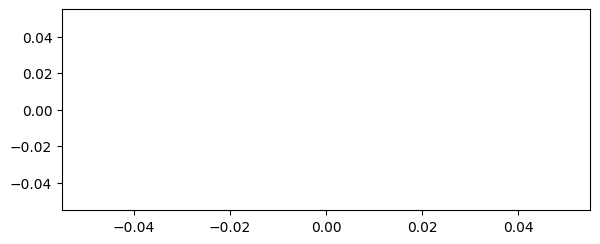

In [ ]:
import numpy as np

# Function to cap outliers using IQR
def cap_outliers(df, numeric_columns):
    """
    Detect and cap outliers using the IQR method.
    Outliers are capped at the lower and upper boundaries.
    """
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

numeric_columns = [
    'referral_friends', 'water_sources', 'shelters', 'island_size', 
    'happiness_index', 'loyalty_score', 'total_refunds_requested', 
    'avg_time_in_euphoria'
]

# Apply the function to cap outliers in the dataset
euphoria_fixed_outliers = cap_outliers(euphoria_data.copy(), numeric_columns)

# Verify that no values exceed the IQR boundaries
outliers_after_capping = {}
for col in numeric_columns:
    Q1 = euphoria_fixed_outliers[col].quantile(0.25)
    Q3 = euphoria_fixed_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_capping[col] = euphoria_fixed_outliers[
        (euphoria_fixed_outliers[col] < lower_bound) | 
        (euphoria_fixed_outliers[col] > upper_bound)].shape[0]

outliers_after_capping

# Create subplots for distribution plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(euphoria_fixed_outliers[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## Handling Missing Values

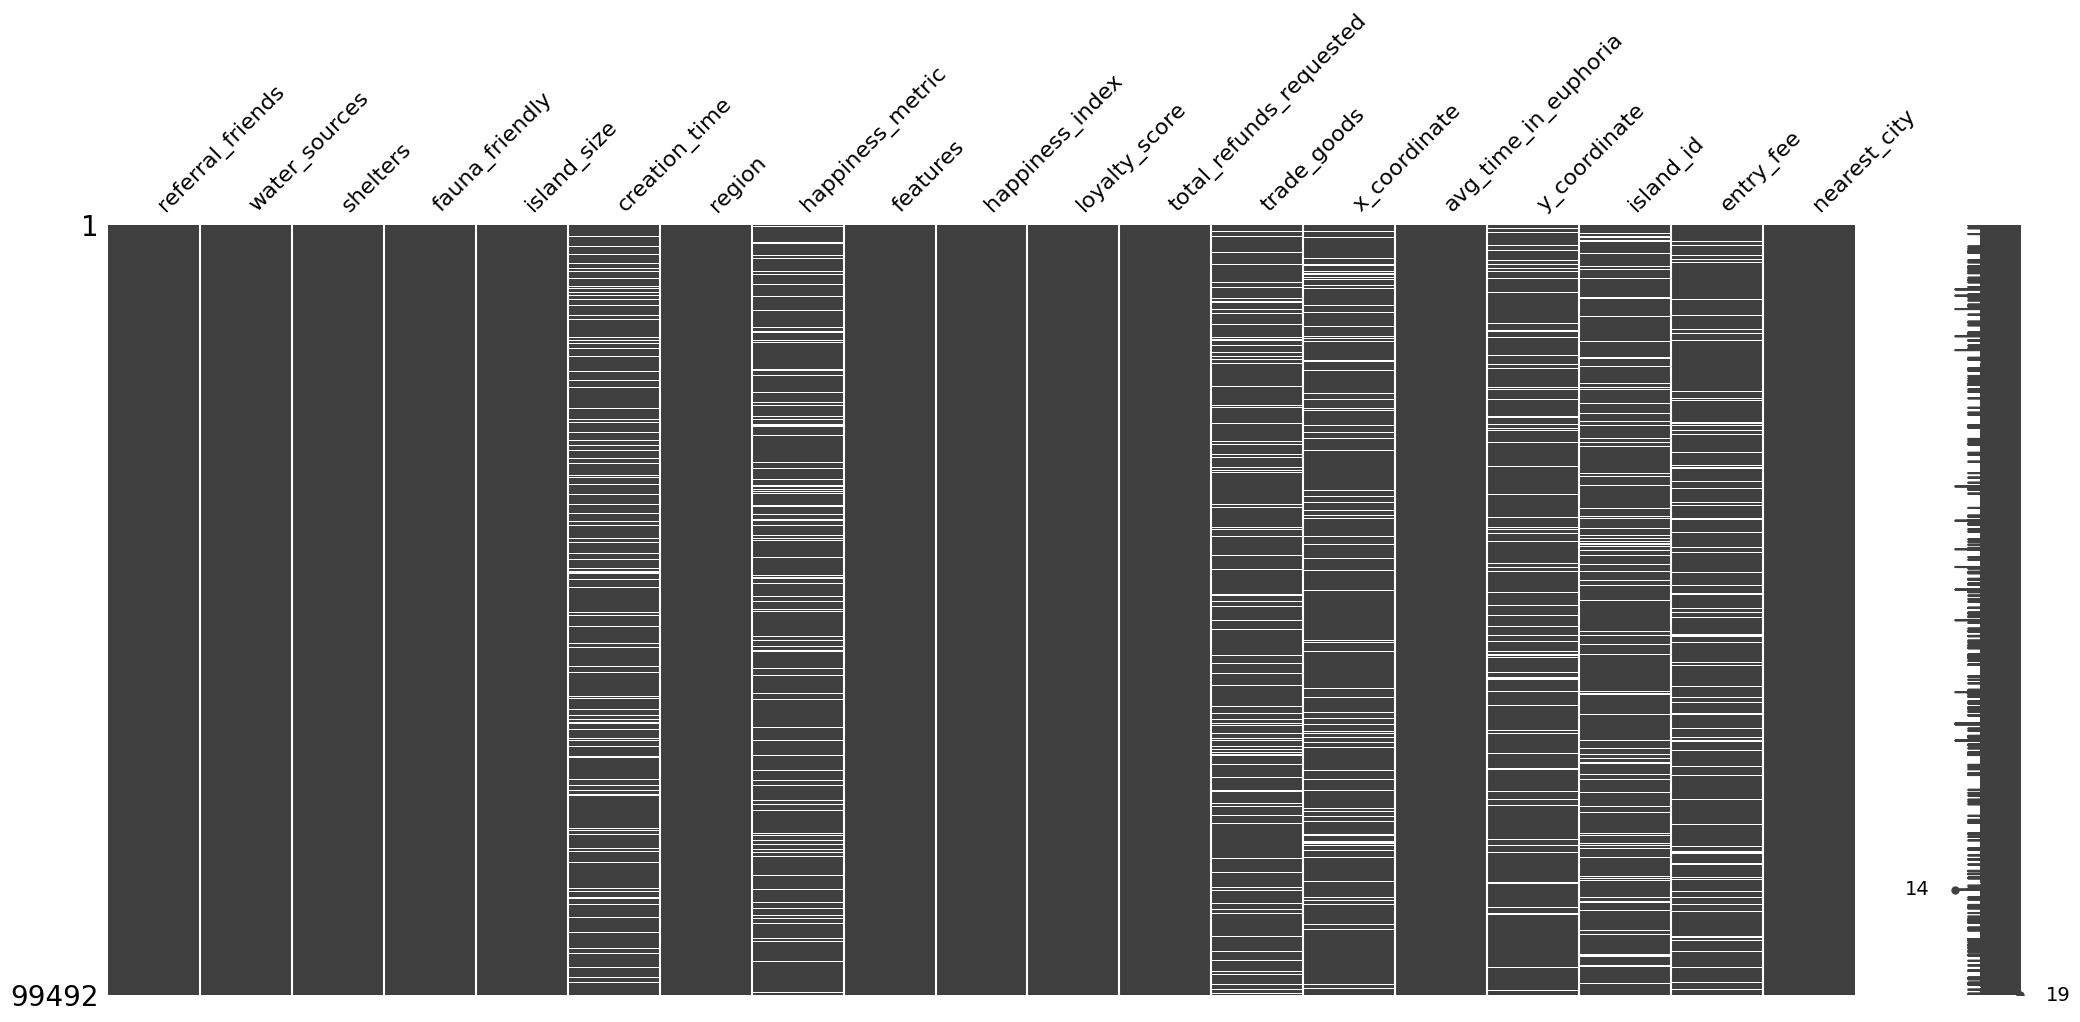

In [175]:
# Define categorical columns for handling missing values
categorical_cols = ['fauna_friendly', 'region', 'features', 'nearest_city']

# Handle missing values for categorical columns by assigning "Unknown"
categorical_cols_with_missing = [col for col in categorical_cols if euphoria_data[col].isnull().sum() > 0]
for col in categorical_cols_with_missing:
    if col in ['fauna_friendly', 'features']:
        euphoria_data[col] = euphoria_data[col].fillna("None")
    else:
        euphoria_data[col] = euphoria_data[col].fillna("Unknown")

euphoria_data['fauna_friendly'] = euphoria_data['fauna_friendly'].replace('Cats,Dogs,None', 'Cats,Dogs')

# Handle missing values for numeric columns by imputing with the median
numeric_cols_with_missing = [col for col in numeric_columns if euphoria_data[col].isnull().sum() > 0]
for col in numeric_cols_with_missing:
    if col in ['referral_friends', 'loyalty_score', 'total_refunds_requested', 'avg_time_in_euphoria']:
        mean_value = euphoria_data[col].mean()
        euphoria_data[col] = euphoria_data[col].fillna(mean_value)
    else:
        median_value = euphoria_data[col].median()
        euphoria_data[col] = euphoria_data[col].fillna(median_value)

# Remove columns with excessive missing values (>70% missing)
threshold = 0.7 * len(euphoria_data)
columns_to_drop = [col for col in euphoria_data.columns if euphoria_data[col].isnull().sum() > threshold]
euphoria_data = euphoria_data.drop(columns=columns_to_drop, axis=1)

# Check if any missing values remain in the dataset
remaining_missing_values = euphoria_data.isnull().sum().sum()

# Output the results
#remaining_missing_values, euphoria_data.info()
p=msno.matrix(euphoria_data)

<class 'pandas.core.frame.DataFrame'>
Index: 89455 entries, 0 to 99491
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         89455 non-null  float64
 1   water_sources            89455 non-null  float64
 2   shelters                 89455 non-null  float64
 3   fauna_friendly           89455 non-null  object 
 4   island_size              89455 non-null  float64
 5   creation_time            80434 non-null  float64
 6   region                   89455 non-null  object 
 7   happiness_metric         80547 non-null  object 
 8   features                 89455 non-null  object 
 9   happiness_index          89455 non-null  float64
 10  loyalty_score            89455 non-null  float64
 11  total_refunds_requested  89455 non-null  float64
 12  trade_goods              80597 non-null  object 
 13  x_coordinate             80470 non-null  float64
 14  avg_time_in_euphoria     89

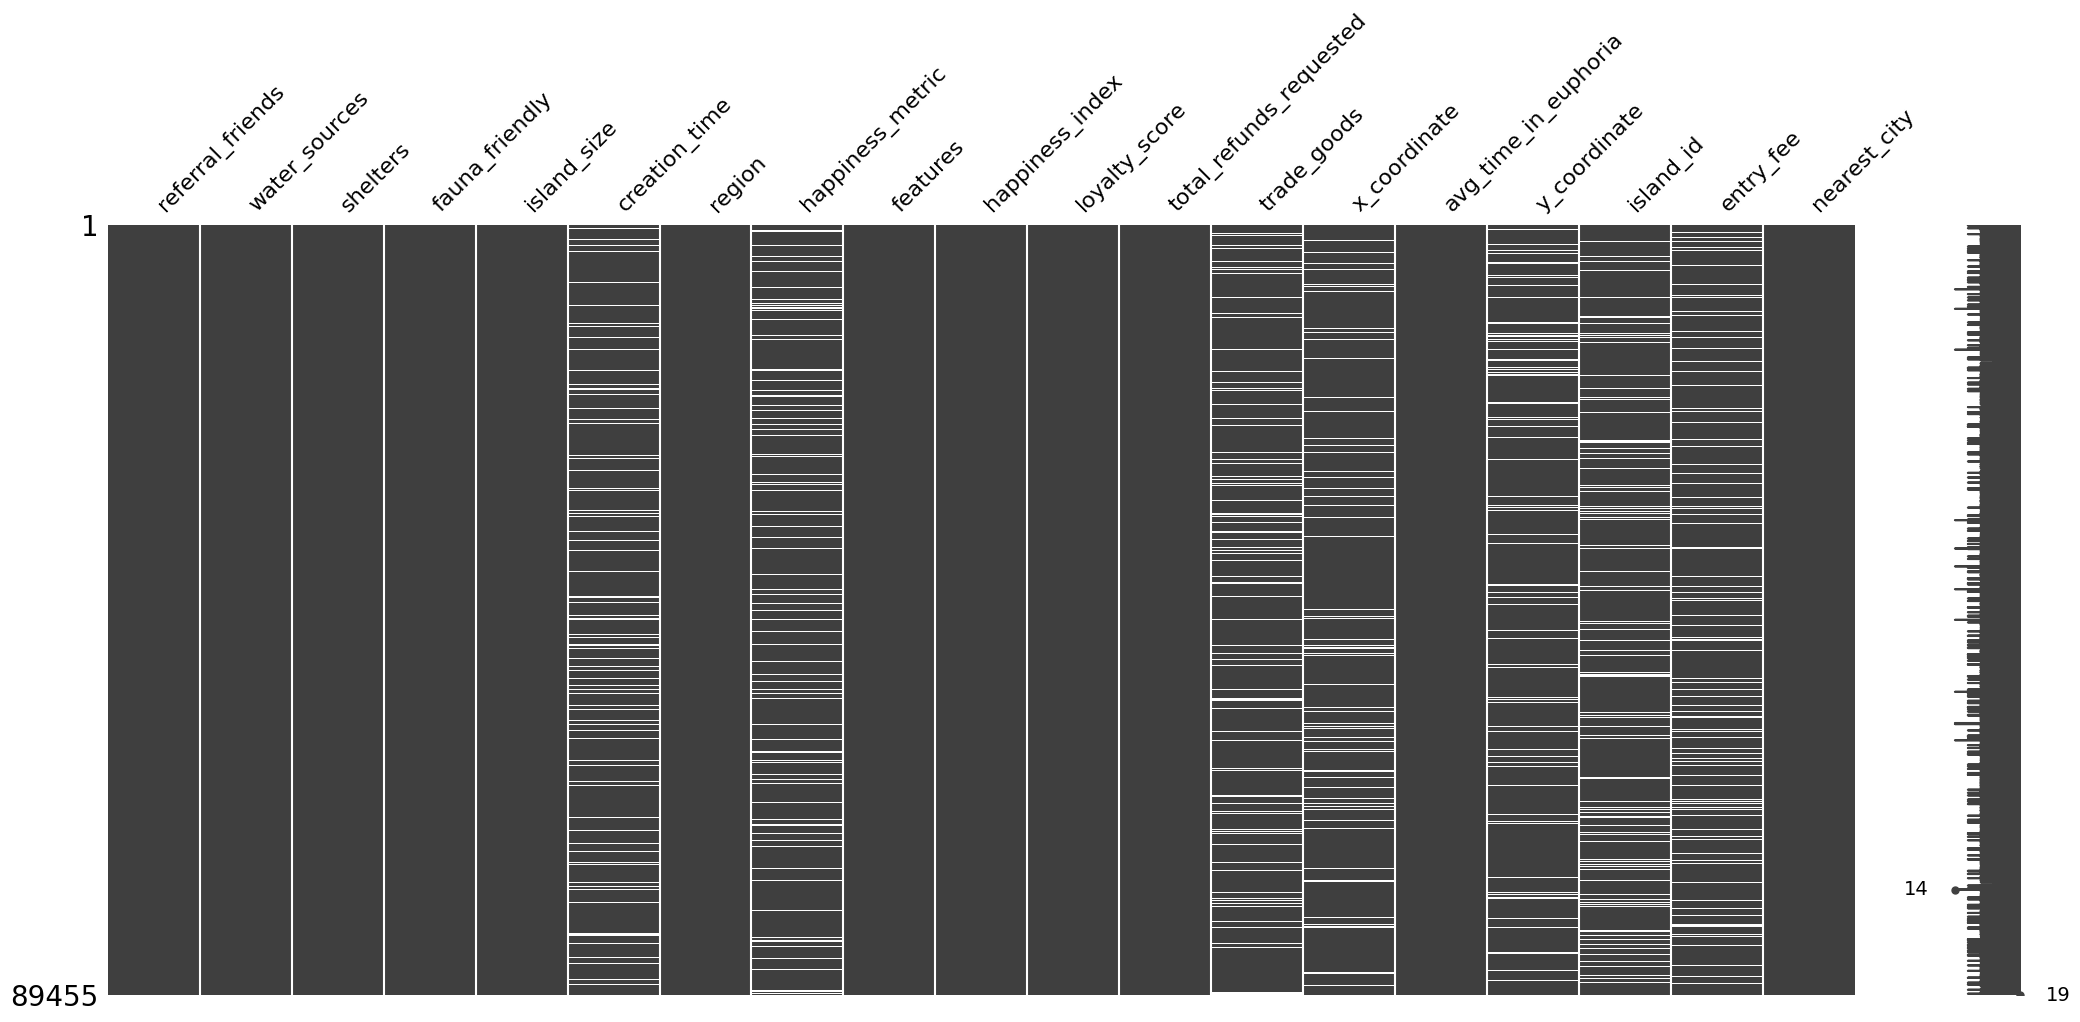

In [176]:
euphoria_fixed_outliers['fauna_friendly'] = euphoria_fixed_outliers['fauna_friendly'].replace('Cats,Dogs,None', 'None')
euphoria_fixed_outliers = euphoria_fixed_outliers.dropna(subset=['happiness_index'])

# Handle missing values for categorical columns by assigning "Unknown"
categorical_cols_with_missing = [col for col in categorical_cols if euphoria_fixed_outliers[col].isnull().sum() > 0]
for col in categorical_cols_with_missing:
    if col in ['fauna_friendly', 'features']:
        euphoria_fixed_outliers[col] = euphoria_fixed_outliers[col].fillna("None")
    else:
        euphoria_fixed_outliers[col] = euphoria_fixed_outliers[col].fillna("Unknown")

# Handle missing values for numeric columns by imputing with the median
numeric_cols_with_missing = [col for col in numeric_columns if euphoria_fixed_outliers[col].isnull().sum() > 0]
for col in numeric_cols_with_missing:
    mean_value = euphoria_fixed_outliers[col].mean()
    euphoria_fixed_outliers[col] = euphoria_fixed_outliers[col].fillna(mean_value)

# Remove columns with excessive missing values (>70% missing)
threshold = 0.7 * len(euphoria_fixed_outliers)
columns_to_drop = [col for col in euphoria_fixed_outliers.columns if euphoria_fixed_outliers[col].isnull().sum() > threshold]
euphoria_fixed_outliers = euphoria_fixed_outliers.drop(columns=columns_to_drop, axis=1)

# Check if any missing values remain in the dataset
remaining_missing_values = euphoria_fixed_outliers.isnull().sum().sum()

# Output the results
remaining_missing_values, euphoria_fixed_outliers.info()
p=msno.matrix(euphoria_fixed_outliers)

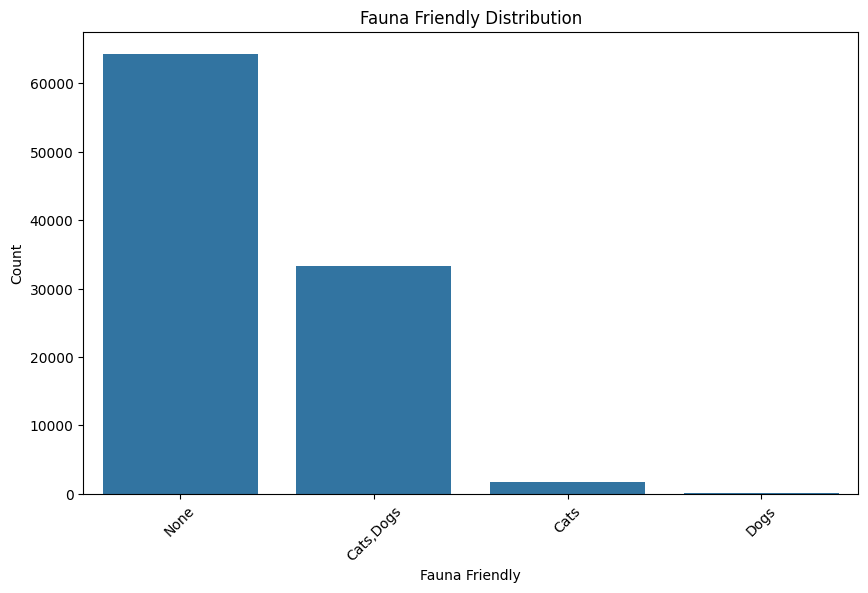

In [177]:
# Fauna Friendly distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=euphoria_data, x='fauna_friendly', order=euphoria_data['fauna_friendly'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Fauna Friendly Distribution')
plt.xlabel('Fauna Friendly')
plt.ylabel('Count')
plt.show()

### Normalization

In [178]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numeric columns
euphoria_fixed_outliers[numeric_columns] = scaler.fit_transform(euphoria_fixed_outliers[numeric_columns])

# Check results
print(euphoria_fixed_outliers[numeric_columns].describe())


       referral_friends  water_sources      shelters   island_size  happiness_index  loyalty_score  total_refunds_requested  avg_time_in_euphoria
count      89455.000000   89455.000000  89455.000000  89455.000000     89455.000000   89455.000000             89455.000000          89455.000000
mean           0.423676       0.177096      0.489217      0.510730         0.480697       0.502086                 0.500203              0.499091
std            0.267134       0.203662      0.191184      0.175660         0.213816       0.302928                 0.123226              0.274285
min            0.000000       0.000000      0.000000      0.000000         0.000000       0.000000                 0.000000              0.000000
25%            0.285714       0.000000      0.285714      0.387920         0.319372       0.222222                 0.375000              0.276333
50%            0.423676       0.000000      0.571429      0.510730         0.436300       0.502086                 0.500000 

### Correlation Matrix

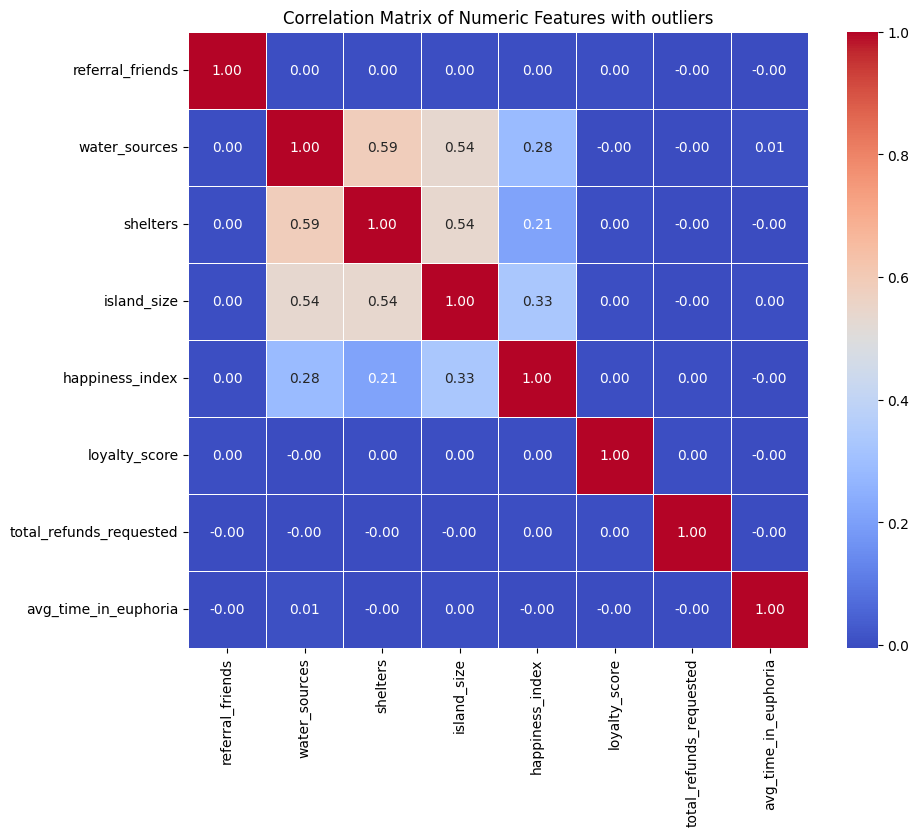

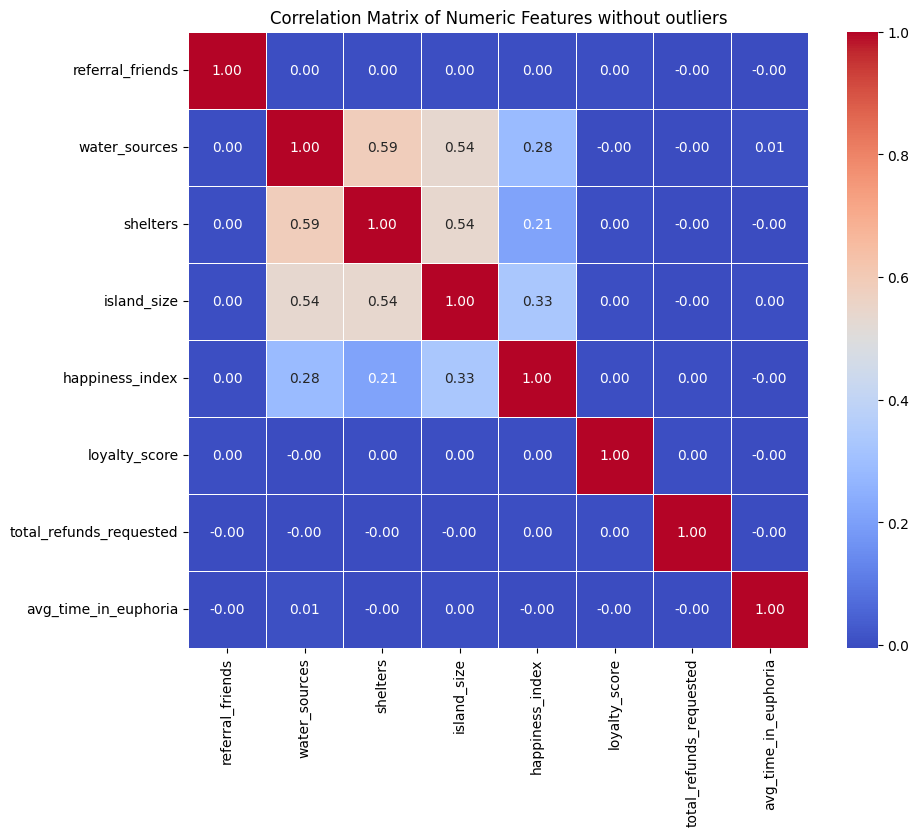

In [179]:
# Compute correlation matrix for numeric columns
correlation_matrix = euphoria_data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features with outliers')
plt.show()

# Compute correlation matrix for numeric columns
correlation_matrix_without_outliers = euphoria_data[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features without outliers')
plt.show()



## Analyzing Categorical Variables Impact on Happiness Index

In [102]:
# # Extract unique cities from the nearest_city column
# euphoria_cities = euphoria_fixed_outliers["nearest_city"].unique()

# # Convert the numpy array of unique cities into a Python list
# euphoria_cities_list = list(euphoria_cities)
# print(euphoria_cities_list)


# # Load your dataset and city-to-state mapping dataset
# city_state_mapping = pd.read_csv('us_cities.csv')  # Replace with SimpleMaps or similar file

# # Create a dictionary for city-to-state mapping
# city_to_state = dict(zip(city_state_mapping['city'], city_state_mapping['state_id']))

# # Map the state to each city in your dataset
# euphoria_fixed_outliers.loc[euphoria_fixed_outliers['region'] == 'Unknown', 'region'] = (
#     euphoria_fixed_outliers['nearest_city']
#     .map(city_to_state)
# )


### Encoding Region Column

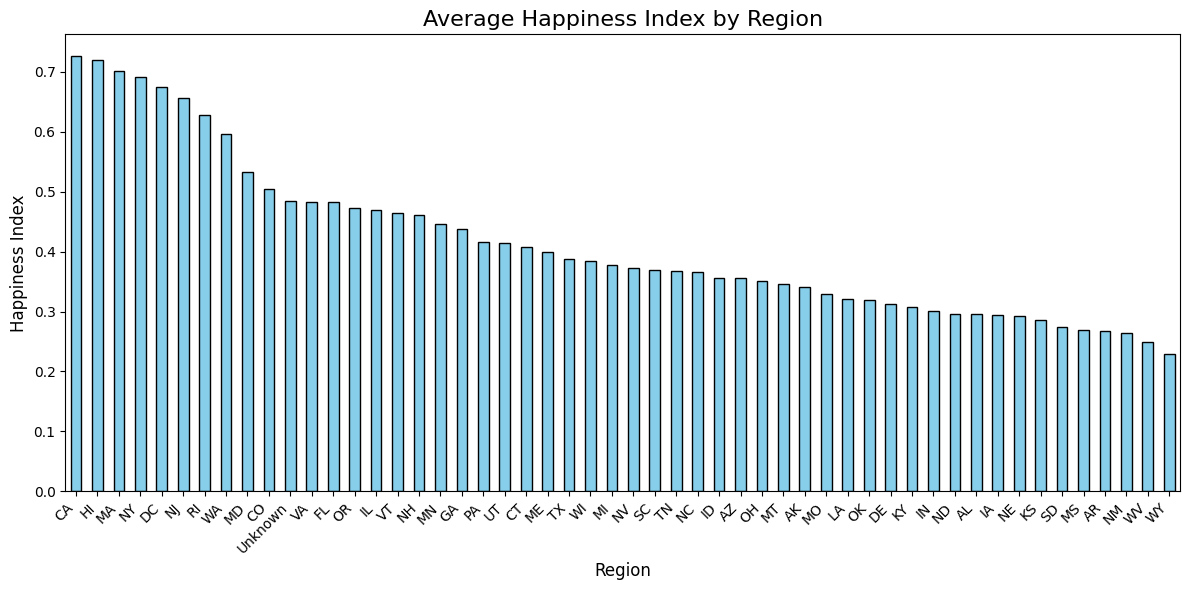

In [ ]:
region_db = euphoria_fixed_outliers[['happiness_index', 'region']]
filtered_data = region_db.dropna(subset=['region'])

# Compute average happiness index for each region
region_happiness = filtered_data.groupby('region')['happiness_index'].mean().sort_values(ascending=False)

# Plot average happiness index by region
plt.figure(figsize=(12, 6))
region_happiness.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Happiness Index by Region', fontsize=16)
plt.ylabel('Happiness Index', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


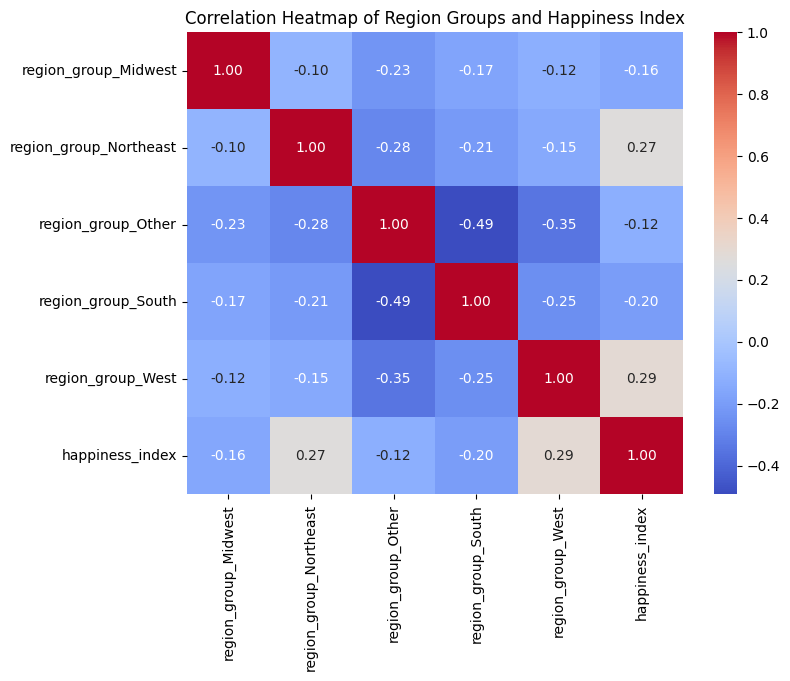

In [ ]:
# Define region groupings
region_groups = {
    'West': ['CA', 'WA', 'OR', 'NV', 'UT'],
    'Midwest': ['IL', 'OH', 'MI', 'MO', 'IA'],
    'South': ['TX', 'FL', 'GA', 'SC', 'NC'],
    'Northeast': ['NY', 'PA', 'MA', 'NJ', 'CT']
}

# Map regions to broader categories
euphoria_region = euphoria_fixed_outliers.copy()
euphoria_region['region_group'] = euphoria_region['region'].map(lambda x: next((k for k, v in region_groups.items() if x in v), 'Other'))

# One-hot encode grouped regions
region_group_encoded = pd.get_dummies(euphoria_region['region_group'], prefix='region_group')
euphoria_region = pd.concat([euphoria_region, region_group_encoded], axis=1)

# Re-run correlation analysis
group_happiness_data = pd.concat([region_group_encoded, euphoria_region['happiness_index']], axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(group_happiness_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Region Groups and Happiness Index')
plt.show()


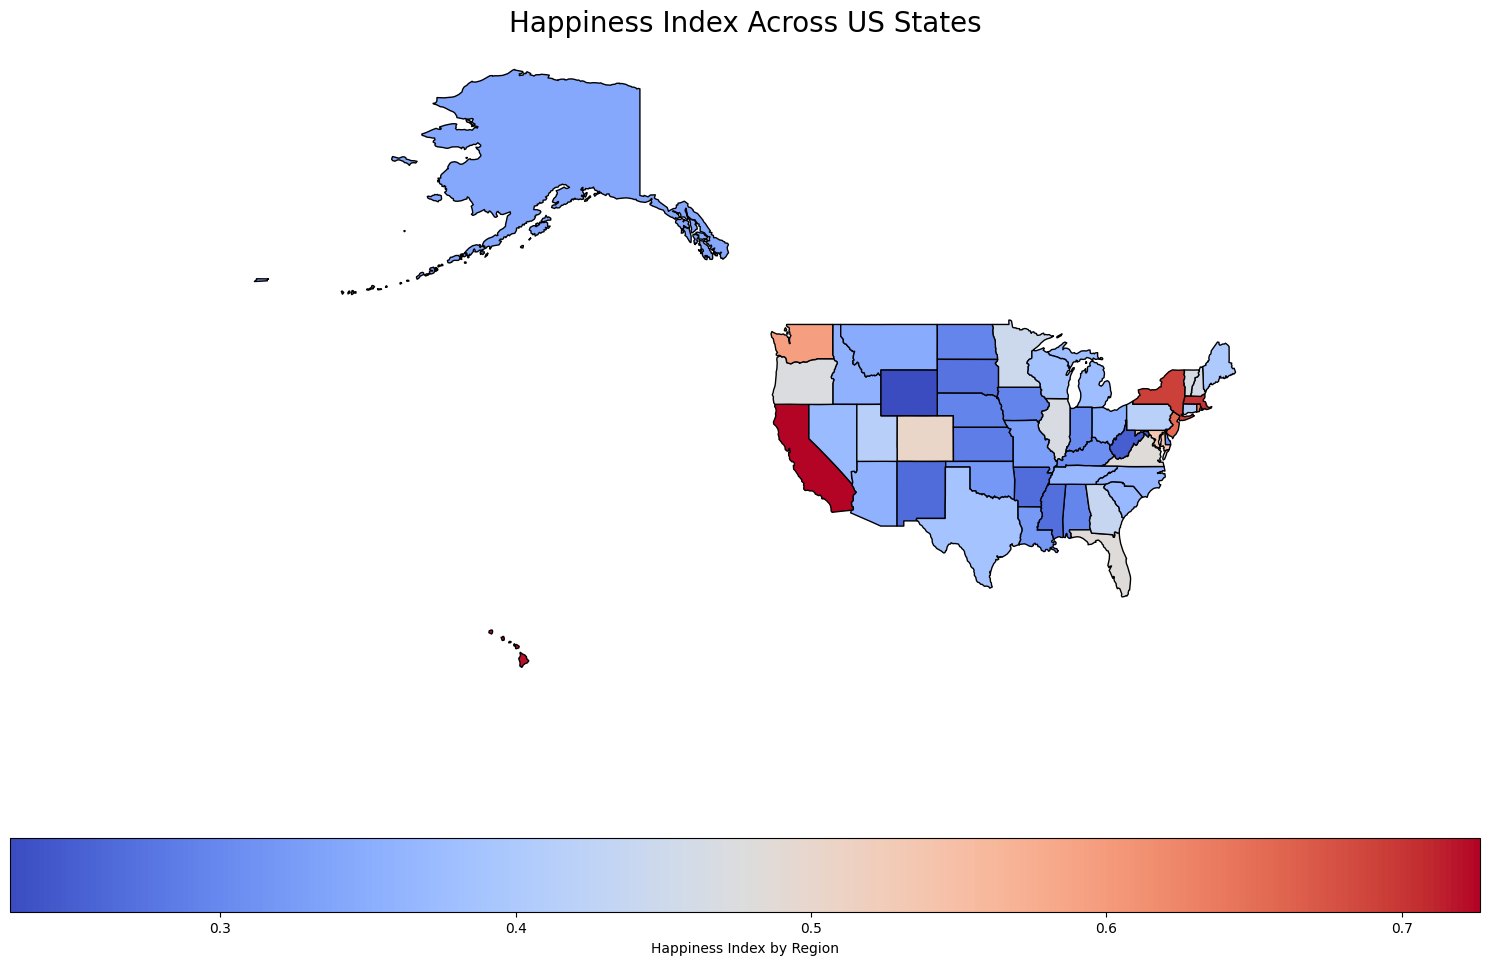

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the GeoJSON or shapefile
geo_data = gpd.read_file('us-states.geojson')  # Replace with your GeoJSON or shapefile path

# Mapping of region abbreviations to full names
abbreviation_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia"
}

# Create a reverse mapping for merging
name_to_abbreviation = {v: k for k, v in abbreviation_to_name.items()}

# Add abbreviation column to geo_data
geo_data["abbreviation"] = geo_data["name"].map(name_to_abbreviation)

# Merge the GeoDataFrame with region happiness data
merged_data = geo_data.merge(region_happiness, left_on="abbreviation", right_index=True)

# Create the GeoDataFrame (without unnecessary geometry conversion)
geo_gdf = gpd.GeoDataFrame(merged_data, geometry="geometry")

# Plot the choropleth map with enhancements
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the happiness index
geo_gdf.plot(
    column="happiness_index",
    cmap="coolwarm",  # Use the same colormap as before
    legend=True,
    legend_kwds={"label": "Happiness Index by Region", "orientation": "horizontal"},
    ax=ax,
    edgecolor="black"  # Add state borders
)

# Add a clear title and remove axes
ax.set_title("Happiness Index Across US States", fontsize=20)
ax.axis("off")  # Remove axis for a clean map

# Show the plot
plt.tight_layout()
plt.show()


### Encoding Feature Column

In [ ]:
# Step 1: Split the 'features' column into individual amenities
euphoria_features = euphoria_fixed_outliers.copy()
euphoria_features['features_split'] = euphoria_features['features'].fillna('').str.split(',')

# Step 2: Flatten the list of amenities to get all unique amenities
unique_amenities = set([amenity.strip() for sublist in euphoria_features['features_split'] for amenity in sublist])
print(f"Total unique amenities: {len(unique_amenities)}")  # Number of unique amenities

# Step 3: Create binary columns for each unique amenity
for amenity in unique_amenities:
    euphoria_features[amenity] = euphoria_features['features_split'].apply(lambda x: 1 if amenity in x else 0)

# Step 4: Drop intermediate 'features_split' column (optional)
data = euphoria_features.drop(columns=['features_split'])

Total unique amenities: 28


In [ ]:
# Compute the correlation matrix
amenity_columns = list(unique_amenities)  # List of one-hot encoded amenity columns
correlation_with_happiness = data[amenity_columns + ['happiness_index']].corr()['happiness_index'].sort_values(ascending=False)

# Exclude `happiness_index` itself
correlation_with_happiness = correlation_with_happiness.drop('happiness_index')

# Display top correlated amenities
print(correlation_with_happiness) 

# Calculate average happiness for presence and absence of each amenity
amenity_impact = {}
for amenity in amenity_columns:
    mean_with_amenity = data.loc[data[amenity] == 1, 'happiness_index'].mean()
    mean_without_amenity = data.loc[data[amenity] == 0, 'happiness_index'].mean()
    amenity_impact[amenity] = {'With Amenity': mean_with_amenity, 'Without Amenity': mean_without_amenity}

# Convert to DataFrame for easier visualization
amenity_impact_df = pd.DataFrame(amenity_impact).T
amenity_impact_df['Difference'] = amenity_impact_df['With Amenity'] - amenity_impact_df['Without Amenity']

# Sort by the impact difference
amenity_impact_df = amenity_impact_df.sort_values(by='Difference', ascending=False)
print(amenity_impact_df)



Elevator              0.101119
Wood Floors           0.098255
Doorman               0.056867
View                  0.048706
Gym                   0.024815
Parking               0.023248
TV                    0.022355
Hot Tub               0.020003
None                  0.019032
Gated                 0.015369
Luxury                0.009820
Alarm                 0.002436
Golf                  0.000476
Patio/Deck           -0.007047
Storage              -0.012640
Pool                 -0.026356
Fireplace            -0.026900
Internet Access      -0.029629
Basketball           -0.036109
AC                   -0.048935
Washer Dryer         -0.050474
Tennis               -0.052196
Cable or Satellite   -0.066044
Dishwasher           -0.068021
Clubhouse            -0.071153
Refrigerator         -0.078313
Garbage Disposal     -0.084461
Playground           -0.128437
Name: happiness_index, dtype: float64
                    With Amenity  Without Amenity  Difference
Doorman                 0.757724

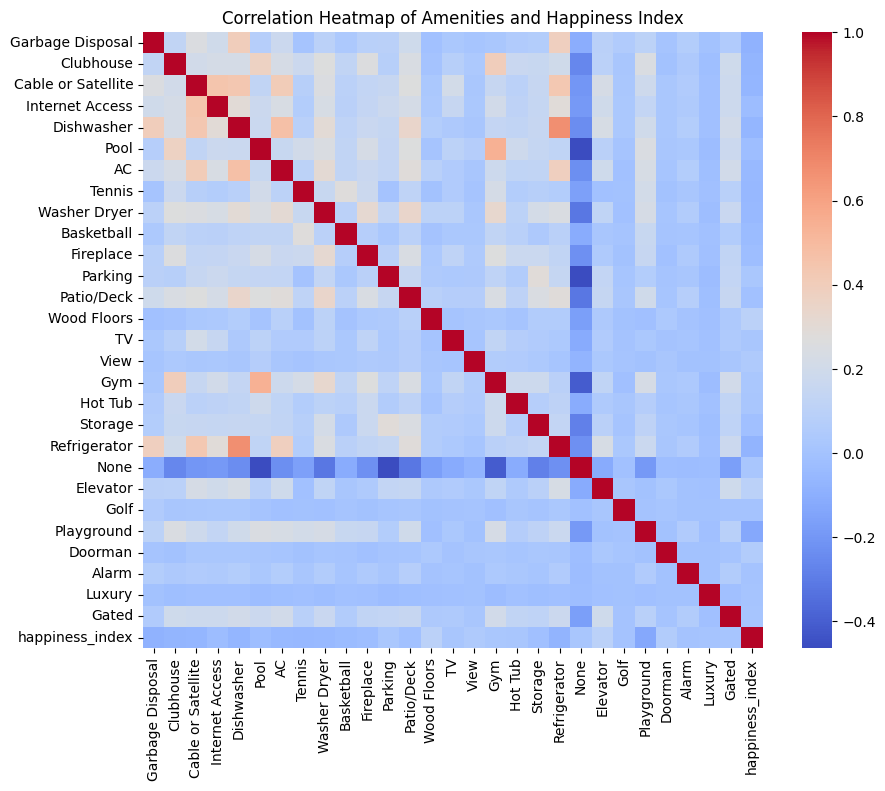

In [ ]:
# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data[amenity_columns + ['happiness_index']].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Amenities and Happiness Index')
plt.show()


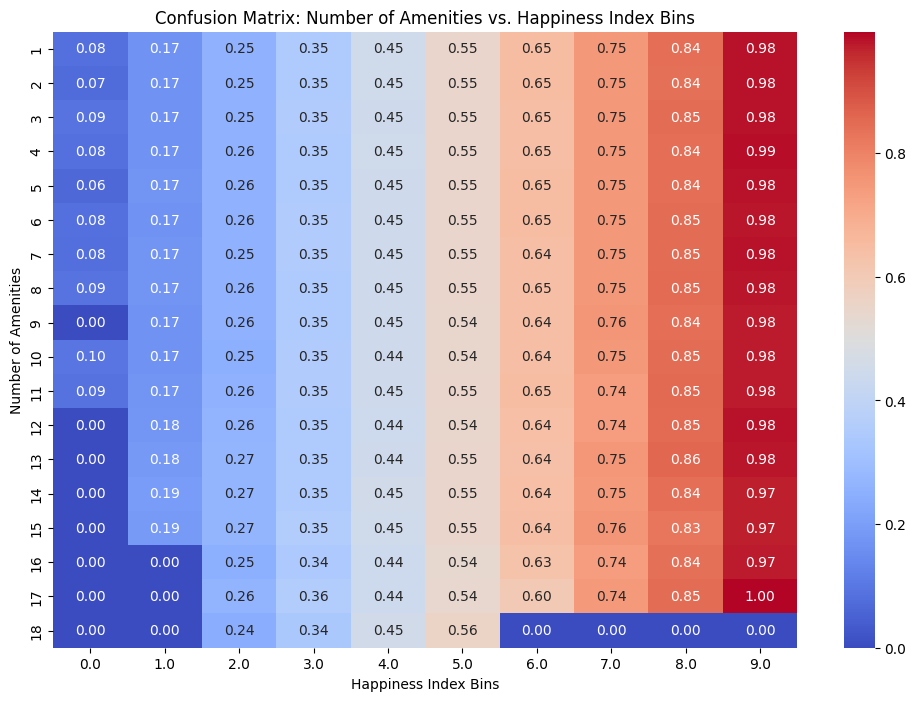

In [ ]:
# Step 1: Ensure the 'num_amenities' column is created
euphoria_features = euphoria_fixed_outliers.copy()
euphoria_features['num_amenities'] = euphoria_features['features'].fillna('').apply(lambda x: len(x.split(',')))

# Step 2: Group by `num_amenities` and compute average happiness_index (optional for validation)
grouped = euphoria_features.groupby('num_amenities')['happiness_index'].mean()

# Step 3: Create bins for happiness_index
euphoria_features['happiness_bin'] = pd.cut(
    euphoria_features['happiness_index'], bins=np.linspace(0, 1, 11), labels=False
)

# Step 4: Create a pivot table or matrix
confusion_matrix_like = euphoria_features.pivot_table(
    index='num_amenities', 
    columns='happiness_bin', 
    values='happiness_index', 
    aggfunc='mean',
    fill_value=0
)

# Step 5: Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_like, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Confusion Matrix: Number of Amenities vs. Happiness Index Bins')
plt.xlabel('Happiness Index Bins')
plt.ylabel('Number of Amenities')
plt.show()


### Encoding Fauna Friendly Column

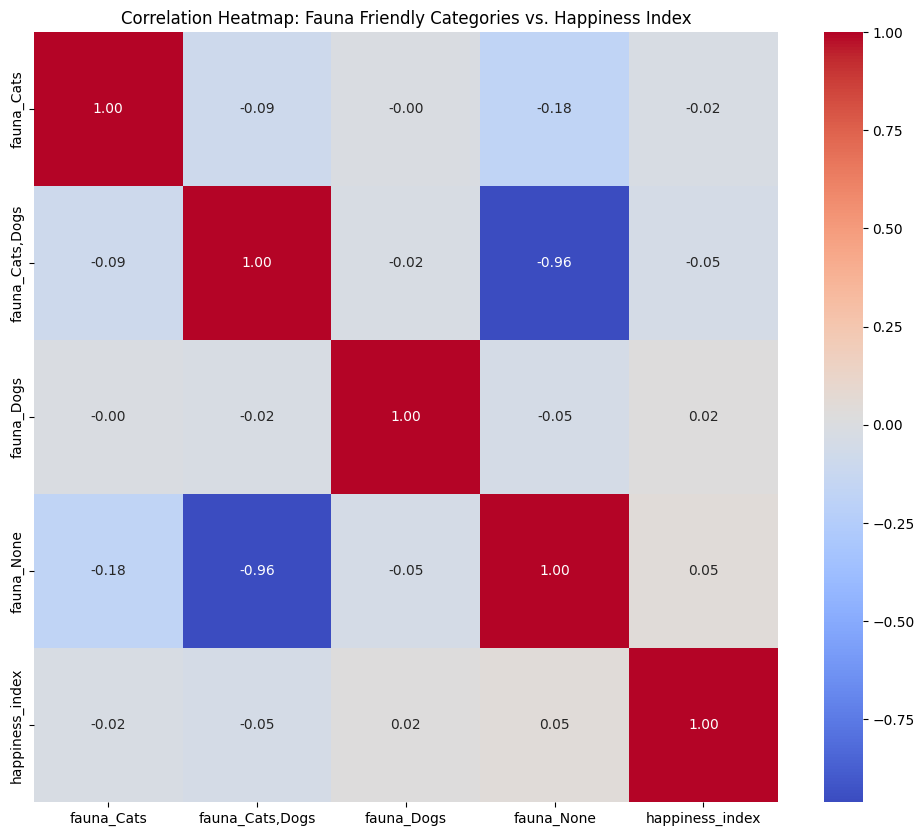

In [ ]:
# Copy dataset
euphoria_fauna = euphoria_fixed_outliers.copy()

# One-hot encode the fauna_friendly column
fauna_encoded = pd.get_dummies(euphoria_fauna['fauna_friendly'], prefix='fauna')

# Combine the one-hot encoded fauna columns with the happiness index
fauna_corr_data = pd.concat([fauna_encoded, euphoria_fauna['happiness_index']], axis=1)

# Check for missing values in the happiness index and drop them
fauna_corr_data = fauna_corr_data.dropna(subset=['happiness_index'])

# Compute the correlation matrix
correlation_matrix = fauna_corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Fauna Friendly Categories vs. Happiness Index')
plt.show()

## K-Means Clustering

### Elbow Method

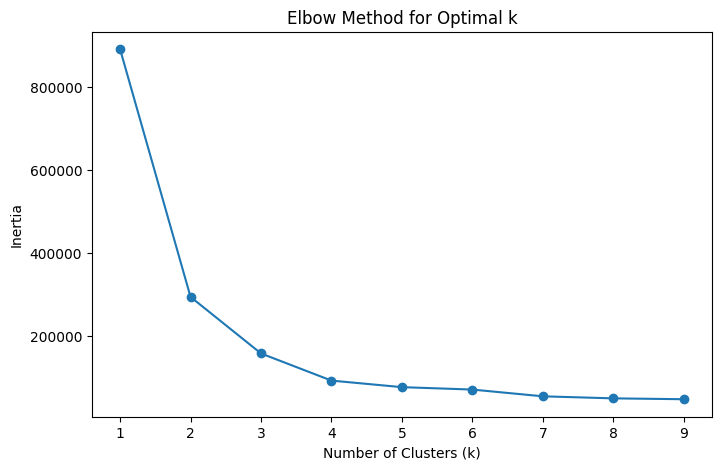

In [ ]:
from sklearn.cluster import KMeans

# Select the numeric columns for clustering
clustering_data = euphoria_region.copy()
clustering_data['num_amenities'] = clustering_data['features'].fillna('').apply(lambda x: len(x.split(',')))

features = ['water_sources', 'shelters', 'island_size', 'happiness_index', 'region_group_Northeast', 'region_group_West', 'num_amenities']
# features = ['water_sources', 'shelters', 'island_size', 'happiness_index', 'region_group_Northeast', 'region_group_West']
# features = ['water_sources', 'shelters', 'island_size', 'happiness_index']
# features = ['island_size', 'happiness_index']
data = clustering_data
X = data[features]

# Determine the optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Applying Clustering

cluster
0    64711
1    24744
Name: count, dtype: int64


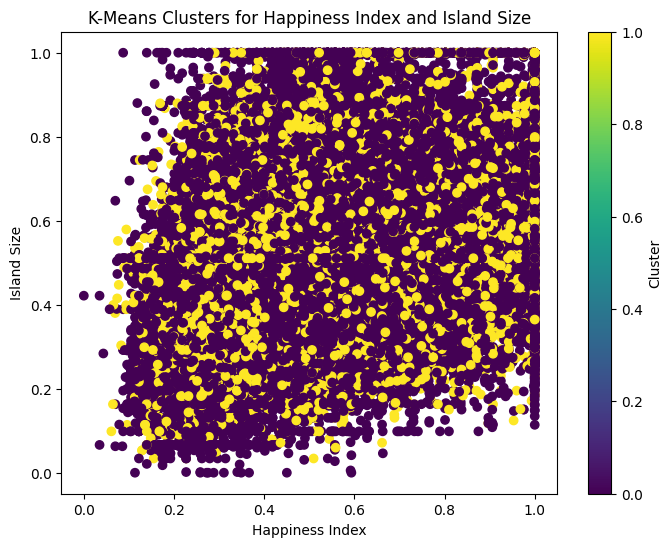

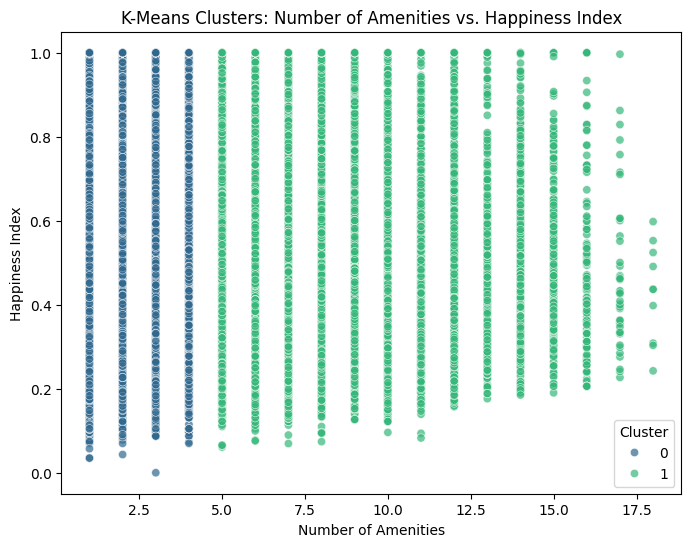

In [ ]:
# Apply K-Means with the chosen number of clusters
optimal_k = 2  # Example; choose based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit(X)

# Add cluster labels to the dataset
data['cluster'] = clusters.labels_

# Print cluster counts
print(data['cluster'].value_counts())

# Scatter plot happiness index vs island size
plt.figure(figsize=(8, 6))
plt.scatter(
    data['happiness_index'],  # X-axis
    data['island_size'],     # Y-axis
    c=data['cluster']
)
plt.title('K-Means Clusters for Happiness Index and Island Size')
plt.xlabel('Happiness Index')
plt.ylabel('Island Size')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot happiness index vs num amenities
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['num_amenities'], 
    y=data['happiness_index'], 
    hue=data['cluster'], 
    palette='viridis', 
    alpha=0.7
)
plt.title('K-Means Clusters: Number of Amenities vs. Happiness Index')
plt.xlabel('Number of Amenities')
plt.ylabel('Happiness Index')
plt.legend(title='Cluster')
plt.show()


### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Pass the actual feature data (X) to silhouette_score
silhouette_kmeans = silhouette_score(X, data['cluster'])
print(f'Silhouette Score: {silhouette_kmeans}')


Silhouette Score: 0.6248306333505543


## BIRCH

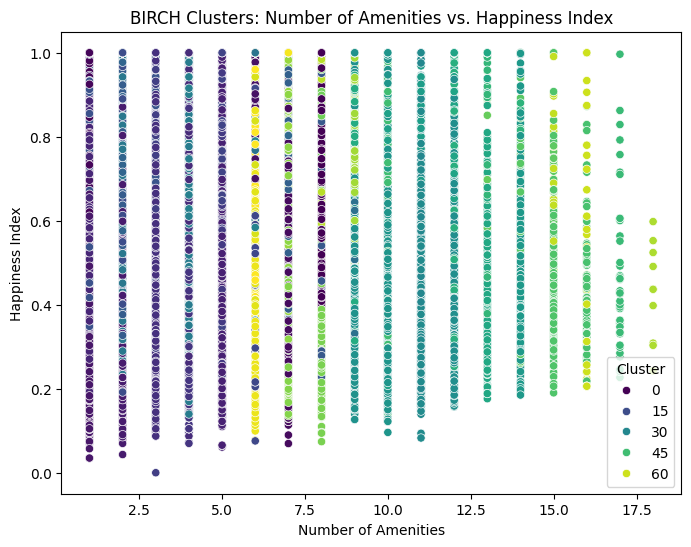

In [114]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
clustering_data = euphoria_region.copy()
clustering_data['num_amenities'] = clustering_data['features'].fillna('').apply(lambda x: len(x.split(',')))

features = ['water_sources', 'shelters', 'island_size', 'happiness_index', 'region_group_Northeast', 'region_group_West', 'num_amenities']
X = clustering_data[features].dropna()  # Drop rows with missing data if needed

# Step 2: Apply BIRCH clustering
birch_model = Birch(n_clusters=None)  # Adjust the number of clusters as needed
clustering_data['cluster'] = birch_model.fit_predict(X)

# Step 3: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data['num_amenities'], 
    y=clustering_data['happiness_index'], 
    hue=clustering_data['cluster'], 
    palette='viridis'
)
plt.title('BIRCH Clusters: Number of Amenities vs. Happiness Index')
plt.xlabel('Number of Amenities')
plt.ylabel('Happiness Index')
plt.legend(title='Cluster')
plt.show()


### Silhouette

In [115]:
silhouette_birch = silhouette_score(X, clustering_data['cluster'])
print(f'Silhouette Score: {silhouette_birch}')

Silhouette Score: 0.4731063073668264


## Hierarchical Clustering

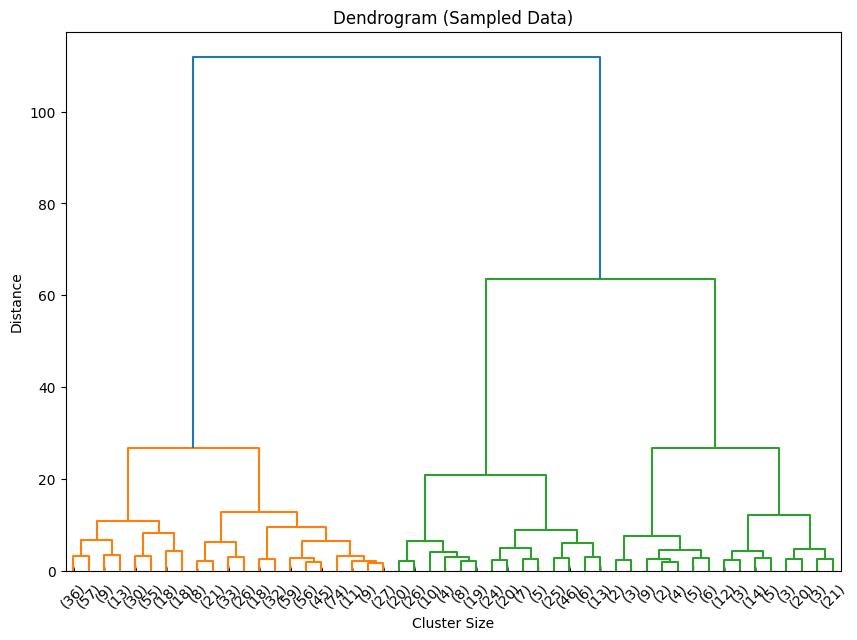

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Prepare the data
clustering_data = euphoria_region.copy()
clustering_data['num_amenities'] = clustering_data['features'].fillna('').apply(lambda x: len(x.split(',')))

features = ['water_sources', 'shelters', 'island_size', 'happiness_index', 'region_group_Northeast', 'region_group_West', 'num_amenities']

# Step 2: Sample the dataset to reduce size
sampled_data = clustering_data.sample(n=1000, random_state=42)  # Adjust the sample size if needed
X_sampled = sampled_data[features].dropna()

# Step 3: Create linkage matrix for the dendrogram
linked = linkage(X_sampled, method='ward')  # You can use 'ward', 'complete', 'average', etc.

# Step 4: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=50, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [117]:
silhouette_agg = silhouette_score(X, clustering_data['cluster'])
print(f'Silhouette Score: {silhouette_agg}')

KeyError: 'cluster'

## DBSCAN

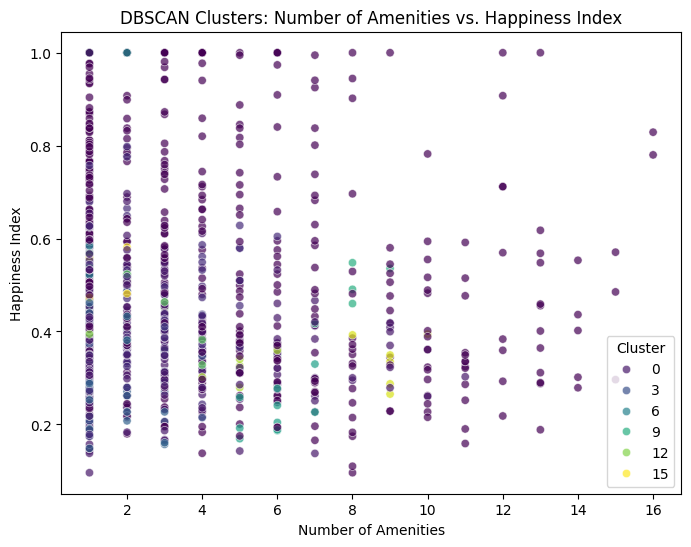

Cluster counts: dbscan_cluster
-1     509
 0     208
 1     117
 4      54
 3      22
 8      12
 2      10
 7      10
 6       8
 5       7
 15      7
 10      7
 12      7
 14      6
 11      6
 9       5
 13      5
Name: count, dtype: int64


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
clustering_data = euphoria_region.copy()
clustering_data['num_amenities'] = clustering_data['features'].fillna('').apply(lambda x: len(x.split(',')))
clustering_data = clustering_data.sample(n=1000, random_state=42)

features = ['water_sources', 'shelters', 'island_size', 'happiness_index', 'region_group_Northeast', 'region_group_West', 'num_amenities']
X = clustering_data[features].dropna()


# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clustering_data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_data['num_amenities'], 
    y=clustering_data['happiness_index'], 
    hue=clustering_data['dbscan_cluster'], 
    palette='viridis', 
    alpha=0.7
)
plt.title('DBSCAN Clusters: Number of Amenities vs. Happiness Index')
plt.xlabel('Number of Amenities')
plt.ylabel('Happiness Index')
plt.legend(title='Cluster')
plt.show()

# Optional: Print the cluster counts
cluster_counts = clustering_data['dbscan_cluster'].value_counts()
print("Cluster counts:", cluster_counts)
